# Carcinoma do endométrio do corpo uterino
Autores: Duarte Velho(pg53841), Joana Lopes(pg53498), Ricardo Oliveira(pg53501)

<p align="justify">
Este trabalho foi desenvolvido no âmbito da UC Extração de Conhecimentos de Dados Biológicos (2023/24), do Mestrado em Bioinformática da Escola de Engenharia da Universidade do Minho, e tem como objetivo a análise de um conjunto de dados de expressão genética relacionados com o Carcinoma Endometrial do Corpo Uterino utilizando python e os seus diversos packages.
</p>

## 1ª parte
<p align="justify">
A primeira fase deste trabalho será constituída pelas seguintes etapas: - explicação dos dados, sua origem e relevância; - tarefas de preparação e de pré-processamento dos dados; - sumarização dos dados (estatística descritiva, exploração com recurso a gráficos); - análise estatística univariada e análise de expressão diferencial e de enriquecimento.
</p>

### Instalação e importação de packages
<p align="justify">
Nesta secção são destacados todos os packages utilizados no trabalho, que facilitam a aquisição e análise de dados ao longo do documento, tornando mais eficiente a obtenção e compreensão das informações relevantes.
</p>

In [246]:
import pandas as pd
import re
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as ols
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import scanpy as sc
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm, datasets

### Introdução

#### Enquadramento


Nos dias de hoje, o cancro é uma das principais causas de morte a nível mundial, sendo que, segundo a Organização Mundial da Saúde (OMS), em 2020, foram diagnosticados cerca de 19,3 milhões de novos casos de cancro, que resultaram na morte, de aproximadamente 10 milhões de pessoas [1].
O preocupante aumento da incidência do cancro ao longo das últimas décadas, levou ao surgimento de iniciativas, tal como a PanCancer Atlas, que visam encontrar respostas para as grandes e abrangentes questões sobre o cancro, através da análise de tumores caracterizados no conjunto de dados resultantes do projeto de The Cancer Genome Atlas (TCGA).
O TCGA é um programa de genómica de referência na área do cancro que, em colaboração com o Instituto Nacional do Cancro (NCI) e o Instituto Nacional de Pesquisa do Genoma Humano (NHGRI) dos Estados Unidos, caracterizou mais de 20 mil cancros primários abrangendo 33 tipos de cancro.
Os tipos de cancro selecionados para estudo cumprem requisitos tais como ter um mau prognóstico, ter um impacto geral na saúde pública, disponibilidade de amostras com a qualidade e quantidade desejadas, entre outros.
(National Cancer Institute, 2022)

O cancro endometrial do corpo uterino, um dos cancros incluídos no TCGA, é o sétimo tumor maligno mais frequente no mundo e o quarto mais comum na mulher sendo a doença ginecológica maligna dominante, tendo provocado em 2011 mais de 8 mil mortes [2, 3].
De todos os cancros do corpo uterino mais de 83% correspondem a carcinomas do endométrio, enquanto apenas 10% dos diagnósticos são classificados como sarcomas [2].
Este tipo de cancro tem ganho maior atenção por parte da comunidade científica, uma vez que se verificou um aumento da sua incidência com a agravante de que a taxa de sobrevivência aos 5 anos é consideravelmente menor, em comparação com o ano de 1975, passando de 88% para cerca de 84%, em 2006, indicando um aumento na mortalidade [3].
A taxa de sobrevivência está fortemente correlacionada com o estádio da doença aquando do diagnóstico, sendo que para pacientes no estádio inicial se considera curável atingindo cerca de 96% de sobrevivência.
No entanto, para fases mais avançadas e de alto grau, é considerado letal reduzindo drasticamente a taxa de sobrevivência para 17%.


#### Objetivo


Com base na problemática apresentada, este trabalho tem como objetivo analisar o perfil transcriptómico de células endometeriais do corpo uterino de pacientes diagnosticados com cancro para determinadas condições descritas nos metadados, de modo a realizar a análise da expressão diferencial com o intuito de compreender qual o efeito do fator no perfil transcriptómico das células e como esse perfil se traduz na gravidade da doença observada.
Os dados utilizados neste trabalho estão disponíveis no [GDC DataPortal](https://shorturl.at/fmpJ5).


### Extração dos dados de transcriptómica e respetivos metadados da base de dados

#### Obtenção dos dados


Com o objetivo de analisar os dados de transcriptómica referente ao carcinoma endometrial do corpo uterino, procedemos à extração da informação que se encontra presente no website cBioPortal, onde se encontram disponibilizados, de forma gratuita, uma grande diversidade de alterações genómicas de vários tipos de cancro, incluindo o cancro selecionado para estudo.
Como no trabalho anterior já procedemos ao download dos dados de expressão genética e dos seus respetivos metadados, apenas se realizou a leitura dos respetivos dados utilizando o package pandas.


In [2]:
gene_exp = pd.read_excel(io="../Data/expressao_genetica.xlsx", index_col=0)
genes_meta = pd.read_excel(io="../Data/genes_metadados.xlsx", index_col=0)
amostras_meta = pd.read_excel(io="../Data/amostras_metadados.xlsx", index_col=0)
print("Leitura dos dados concluída")

Leitura dos dados concluída


In [3]:
print(f"Classe dos dados de expressão:{type(gene_exp)}")
print(f"Classe dos dados de expressão:{type(genes_meta)}")
print(f"Classe dos dados de expressão:{type(amostras_meta)}")
print(f"\nO dataframe da expressão genética tem {gene_exp.shape[0]} linhas e {gene_exp.shape[1]} colunas")
print(f"O dataframe dos genes possui {genes_meta.shape[0]} linhas e {genes_meta.shape[1]} colunas")
print(f"O dataframe das amostras tem {amostras_meta.shape[0]} linhas e {amostras_meta.shape[1]} colunas")
print(f"\nNomes das 5 primeiras colunas do dataframe de expressão genética: {gene_exp.columns.values[0:5]}")
print(f"Nomes das 5 primeiras colunas do dataframe dos genes: {genes_meta.columns.values[0:5]}")
print(f"Nomes das 5 primeiras colunas do dataframe das amostras: {amostras_meta.columns.values[0:5]}")

Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>
Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>
Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>

O dataframe da expressão genética tem 60660 linhas e 589 colunas
O dataframe dos genes possui 60660 linhas e 10 colunas
O dataframe das amostras tem 589 linhas e 78 colunas

Nomes das 5 primeiras colunas do dataframe de expressão genética: ['TCGA-FI-A3PX-01A-11R-A22K-07' 'TCGA-BG-A221-01A-21R-A157-07'
 'TCGA-EY-A1GK-01A-11R-A13S-07' 'TCGA-BG-A2AE-01A-11R-A16F-07'
 'TCGA-AX-A1CE-01A-11R-A137-07']
Nomes das 5 primeiras colunas do dataframe dos genes: ['source' 'type' 'score' 'phase' 'gene_id']
Nomes das 5 primeiras colunas do dataframe das amostras: ['barcode' 'patient' 'sample' 'shortLetterCode' 'definition']


Através da análise exploratória inicial dos dados verificou-se que os dados de expressão genénitca, dos metadados associados aos genes e dos metadados associados às amostras estão no formato de dataframe. O dataframe da expressão genética é constituído por 60660 linhas que correspondem ao genes para o qual se estudou a sua expressão genética e 589 colunas que representam as amostras análisadas no estudo. Para cada gene existem 10 colunas de metadados associados que fornecem informação adicional sobre os genes, incluindo o gene_id (código Ensembl), tal como a sua fonte, o nome do gene, entre outros atributos, que podem ser acessados e explorados.
Em relação às amostras, existem 78 colunas de metadados que possibilitam a caracterização das 589 amostras utilizadas neste estudo possibilitando a análise do impacto que as diversas características possuem no estádio ou na gravidade da doença com base nos dados da expressão genética de cada amostra.

Por diversas razões, é frequente trabalhar com metadados associadas às amostras que possuem uma elevada quantidade de valores omissos, o que pode levar a uma redução considerável das amsotras utilizadas em estudo caso a variável que se pretende análisar seja uma das que apresenta elevada percentagem de valores omissos. Para evitar tal acontecimento, primeiramente procedeu-se a uma filtragem do datafram "amostras_meta" com o intuito de apenas preservar as variavíes que possuem menos de 10% de valores omissos

In [4]:
# Filtrar as colunas que são objetos
data_types = amostras_meta.dtypes
string_cols = data_types[data_types == 'object'].index
amostras_meta_filtered = amostras_meta[string_cols]


# Identificar colunas com mais de 60 contagens de "not reported" 
rm_not_reported = amostras_meta_filtered.apply(lambda x: x.str.lower().str.count("not reported").sum() > 60)
rm_not_reported = rm_not_reported.index[rm_not_reported].tolist()


# Identificar colunas com mais de 60 contagens de "unkown" 
rm_unkown = amostras_meta_filtered.apply(lambda x: x.str.lower().str.count("unknown").sum() > 60)
rm_unkown = rm_unkown.index[rm_unkown].tolist()


# Identificar colunas com mais de 60 valores NA
rm_nas = amostras_meta.isna().sum() > 60
rm_nas = rm_nas.index[rm_nas].tolist()


# Remover colunas identificadas
amostras_meta_reduzido = amostras_meta.drop(columns=rm_not_reported + rm_unkown + rm_nas)


# Obter dimensões do DataFrame reduzido
dimensao = amostras_meta_reduzido.shape
print(f"Dimensões do DataFrame filtrado: {dimensao}")
print(f"\nNomes das colunas do dataframe das amostras filtrado: {amostras_meta.columns.values}")


Dimensões do DataFrame filtrado: (589, 46)

Nomes das colunas do dataframe das amostras filtrado: ['barcode' 'patient' 'sample' 'shortLetterCode' 'definition'
 'sample_submitter_id' 'sample_type_id' 'tumor_descriptor' 'sample_id'
 'sample_type' 'composition' 'days_to_collection' 'state' 'initial_weight'
 'preservation_method' 'pathology_report_uuid' 'submitter_id'
 'oct_embedded' 'specimen_type' 'is_ffpe' 'tissue_type' 'figo_stage'
 'synchronous_malignancy' 'days_to_diagnosis' 'treatments'
 'last_known_disease_status' 'tissue_or_organ_of_origin'
 'days_to_last_follow_up' 'age_at_diagnosis' 'primary_diagnosis'
 'prior_malignancy' 'year_of_diagnosis' 'prior_treatment' 'morphology'
 'classification_of_tumor' 'diagnosis_id' 'icd_10_code'
 'site_of_resection_or_biopsy' 'tumor_grade' 'progression_or_recurrence'
 'alcohol_history' 'exposure_id' 'race' 'gender' 'ethnicity'
 'vital_status' 'age_at_index' 'days_to_birth' 'year_of_birth'
 'demographic_id' 'year_of_death' 'days_to_death' 'bcr_pati

Com esta filtragem o número de colunas passou de 78 para 46 garantindo assim que as características que possam ser utilizadas para as análises posteriores abrangem a maioria das amostras garantindo maior confiabilidade na análise realizada.


### Análise Descritiva e Exploratória

Para o nosso estudo, de entre as colunas de metadados reduzida, selecionou-se 4 variáveis de caraterísticas distintas, nomeadamente as colunas "vital_status", "primary_diagnosis", "age_at_index" e "figo_stage" para se proceder a uma análise descritiva e exploratória das amostras. A variável figo_state representa o estádio do cancro, nomeadamente no que diz respeito à sua extensão.
Esta classificação está dividia em 4 estádios principais (estádio I, estádio II, estádio III e estádio IV), no entanto, cada estádio encontra-se subdividido. Neste estudo, para conseguirmos visualizar os dados de forma mais eficiente, e dado o objetivo deste trabalho, decidiu-se proceder a uma transformação desta variável, agrupando os diferentes sub-estádios nas suas 4 categorias principais.

In [5]:
meta_amostras = amostras_meta_reduzido[["vital_status", "primary_diagnosis", "age_at_index","figo_stage"]]

# substituir os valores de figo state apenas pelas iniciais
meta_amostras['figo_stage'] = meta_amostras['figo_stage'].replace(r'.*\b(Stage [VI]+).*', r'\1', regex=True)
meta_amostras

C:\Users\ricar\AppData\Local\Temp\ipykernel_2060\753344565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_amostras['figo_stage'] = meta_amostras['figo_stage'].replace(r'.*\b(Stage [VI]+).*', r'\1', regex=True)


,vital_status,primary_diagnosis,age_at_index,figo_stage
row.names(amostras_metadados),,,,
TCGA-FI-A3PX-01A-11R-A22K-07,Alive,"Serous cystadenocarcinoma, NOS",57.0,Stage III
TCGA-BG-A221-01A-21R-A157-07,Alive,"Endometrioid adenocarcinoma, NOS",84.0,Stage I
TCGA-EY-A1GK-01A-11R-A13S-07,Alive,"Endometrioid adenocarcinoma, NOS",74.0,Stage I
TCGA-BG-A2AE-01A-11R-A16F-07,Alive,"Serous cystadenocarcinoma, NOS",57.0,Stage I
TCGA-AX-A1CE-01A-11R-A137-07,Alive,"Endometrioid adenocarcinoma, NOS",60.0,Stage I
...,...,...,...,...
TCGA-AJ-A3NF-01A-11R-A22K-07,Alive,"Serous cystadenocarcinoma, NOS",60.0,Stage III
TCGA-BK-A0C9-01A-11R-A00V-07,Alive,"Endometrioid adenocarcinoma, NOS",57.0,Stage I
TCGA-AJ-A5DW-01A-11R-A27V-07,Alive,"Endometrioid adenocarcinoma, NOS",56.0,Stage I


#### Vital status
A coluna "vital_status", corresponde a uma variável nominal que representa a sobrevivência da paciente com cancro no momento do estudo.
Esta variável pode assumir 3 categorias distintas: "Alive", "Dead", "NA".
Neste dataset verificou-se que, no momento de recolha das amostras, dos 589 pacientes, aproximadamente 81% estavam vivos e 16% tinham falecido, por fim cerca de 2% das amostras não possuem informação disponível acerca do estado vital dando por isso sido reportados como "NAs".

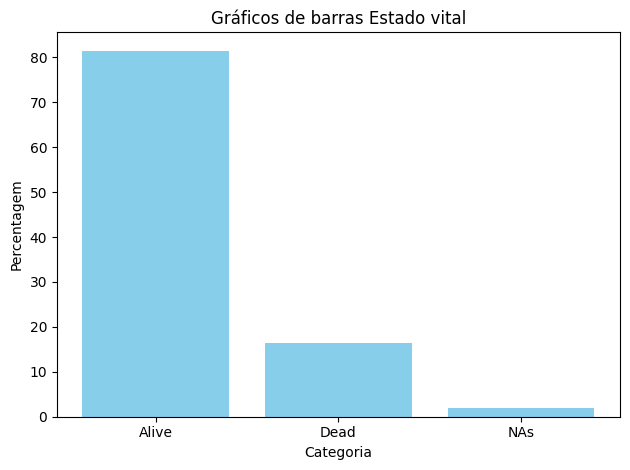

In [6]:
estado_vital = pd.DataFrame(meta_amostras["vital_status"])


# Calculo das percentagens de cada categoria
alive_count = estado_vital [estado_vital["vital_status"] =="Alive"].value_counts().values[0]/589; alive_count= alive_count*100
dead_count = estado_vital [estado_vital["vital_status"] =="Dead"].value_counts().values[0]/589; dead_count = dead_count*100
nas_vital_status = 100 - (alive_count + dead_count)


# Criação da estrutura de dados para o barplot
categories = ["Alive", "Dead", "NAs"]
values = [alive_count, dead_count, nas_vital_status]


# Criação do gráfico de barras
plt.bar(categories,values, color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Percentagem')
plt.title('Gráficos de barras Estado vital')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

#### Primary diagnosis

A coluna "primary_diagnosis", corresponde a uma variável nominal, e descreve o diagnóstico histológico do paciente, de acordo com a Classificação Internacional de Doenças para Oncologia (International Classification of Diseases for Oncology, ICD-O) da Organização Mundial da Saúde.
Apresenta 8 categorias possíveis "Adenocarcinoma, NOS", "Carcinoma, undifferentiated, NOS", "Clear cell adenocarcinoma, NOS", "Endometrioid adenocarcinoma, NOS", "Endometrioid adenocarcinoma, secretory variant", "Papillary serous cystadenocarcinoma", "Serous cystadenocarcinoma, NOS", "Serous surface papillary carcinoma".
A desginação "NOS", Not Otherwise Specified, apenas indica que com base nas informações disponíveis, um determinado tipo de cancro não pode ser encaixado noutra categoria mais específica.
É de notar que apenas foram consideradas as amostras que não possui valores omissos o que levou a uma redução de 589 amostras para 577

Verificou-se que os dados vão de encontro à literatura, sendo o adenocarcinoma do endométrio o tipo de cancro prevalecente neste estudo, com cerca de 73.3% das pacientes diagnosticadas com este tipo de cancro do corpo uterino.
Logo de seguida temos 24.8% das pacientes com cistoadenocarcinomas serosos e 1.9% com outros tipos de cancro que agrupamos na categoria "Outros".

Número total de amostras sem valores omissos: 577


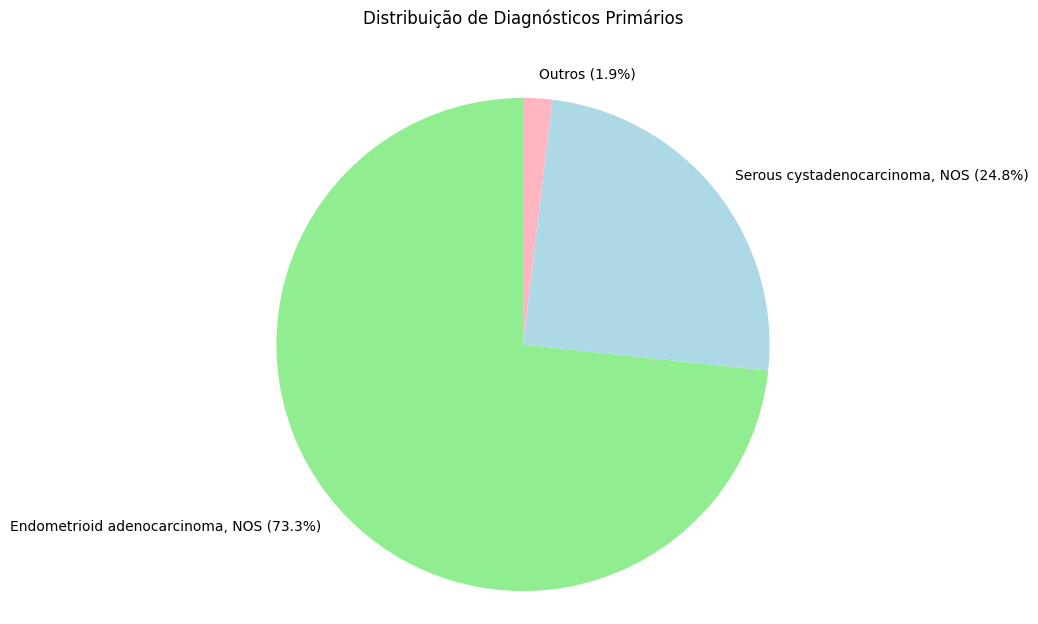

In [7]:
primary_diagnosis = pd.DataFrame(meta_amostras['primary_diagnosis'].value_counts())
print("Número total de amostras sem valores omissos:",sum(primary_diagnosis["count"].values))


# Calculo das percentagens
primary_diagnosis['percent'] = primary_diagnosis['count'] / primary_diagnosis['count'].sum() * 100


# Criação da linha outros
primary_diagnosis_red = pd.DataFrame(primary_diagnosis.iloc[0:2,1])
primary_diagnosis_red.loc["Outros"] = sum(primary_diagnosis.iloc[2:8,1])


# Preparação dos dados para o gráfico circular
labels = primary_diagnosis_red.index.to_list()
percentages = primary_diagnosis_red["percent"].values
formatted_labels = [f"{label} ({percentage:.1f}%)" for label, percentage in zip(labels, percentages)]


# Criação do gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(percentages, labels=formatted_labels, startangle=90, colors=['lightgreen', 'lightblue', 'lightpink'])
plt.title("Distribuição de Diagnósticos Primários", y=1.08)
plt.axis('equal')

plt.show()

#### Estádio FIGO

A variável "figo_stage", é ordinal e representa o estádio do cancro, nomeadamente no que diz respeito à sua extensão, especialmente se a doença se espalhou do local original para outras partes do corpo, conforme descrito pelos estádios da Federação Internacional de Ginecologia e Obstetrícia (FIGO) [4].
Esta classificação está dividia em 4 estádios principais, nomeadamente, estádio I onde o tumor está confinado ao corpo uterino, estádio II onde já existe envolvimento do cérvix/colo uterino, estádio III que representa um atingimento de estruturas adjacentes do mesmo órgão, como, por exemplo, os gânglios linfáticos da zona pélvica.
Por último, o estádio IV corresponde ao estado de doença em que já existem metástases noutros órgãos como por exemplo no intestino.
É importante referir que para esta análise apenas foram consideradas as amostras sem valores omissos, significando que das 589 amostras apenas 577 foram utilizadas nesta análise.

Desta forma, esta variável toma 4 níveis "STAGE I", "STAGE II", "STAGE III" e "STAGE IV", sendo que 61.5% das amostras são de tumores em "STAGE I", 9.4% em "STAGE II", 23.7% em "STAGE III", 5.4% em "STAGE IV".
Com isto conclui-se que, mais de metade dos tumores em estudo, são confinados ao corpo uterino, e uma parte considerável correspondem a tumores mais agressivos, com extensão para estruturas adjacentes ao órgão reprodutor feminino (23.7%) ou com atingimento de outros órgãos (5.4%).

Numero de amostras total sem NAs: 577


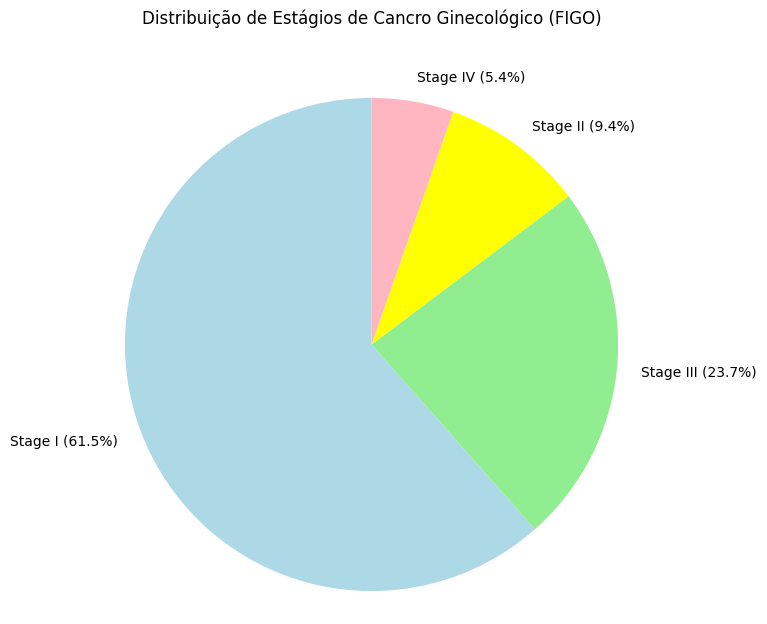

In [8]:
# Isolamento da variável figo_state
figo_state = pd.DataFrame(meta_amostras['figo_stage'].value_counts())
print("Numero de amostras total sem NAs:", sum(figo_state['count'].values))


# Calculo das percentagens
figo_state['percent'] = figo_state['count']/figo_state['count'].sum()* 100


# Preparação dos dados
labels = figo_state.index.to_list()
percentages = figo_state['percent'].to_list()
formatted_labels = [f"{label} ({percentage:.1f}%)" for label, percentage in zip(labels, percentages)]

# Criação do gráfio circular
plt.figure(figsize=(7, 7))
plt.pie(percentages, labels=formatted_labels, colors=['lightblue', 'lightgreen', 'yellow', 'lightpink', 'orchid'], startangle=90)
plt.title("Distribuição de Estágios de Cancro Ginecológico (FIGO)", y=1.08)
plt.axis('equal')

plt.show()

#### Idade dos pacientes

A variável "age_at_index", é proporcional contínua, e representa a idade das pacientes em estudo. No entanto, das 589 pacientes apenas foram utilizadas 574 pacientes, uma vez que as restantes  15 pacientes não possuem disponível informação relativamente à sua idade.

Ao realizar-se a análise das estatísticas sumárias verificou-se que a idade média das pacentes é de 63.8 anos sendo que idade mínima registada é de 31 e a máxima de 90 anos. Além disso, através criação de um boxplot, observou-se que a maioria dos pacientes tem idade compreendida entre os 57 e 71 anos, sendo que metade das pacientes em estudo possui 64 ou menos anos. Em adição, é também possível verificar-se a existência de 4 outilers indicando a existência de pacientes consideravelmente mais novos do que a maioria.


A análise do histograma da idade dos pacientes parece indicar uma ligeira inclinação para a direita, no entanto como os valores da mediana e da média são bastante próximos, pode-se concluir que a idade dos pacientes apresenta uma simetria aproximada.

Estatísticas sumárias:
count    574.000000
mean      63.848432
std       11.171815
min       31.000000
25%       57.000000
50%       64.000000
75%       71.000000
max       90.000000
Name: age_at_index, dtype: float64

Número de amostras sem Nas: 574


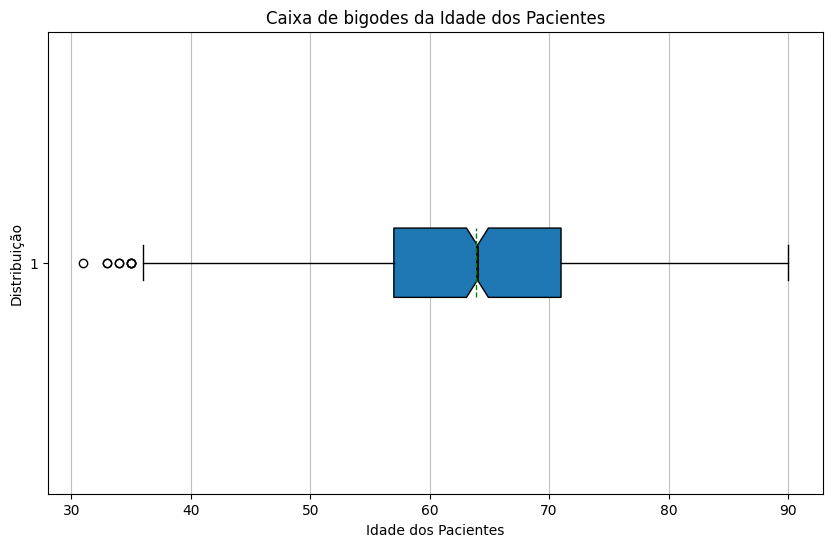

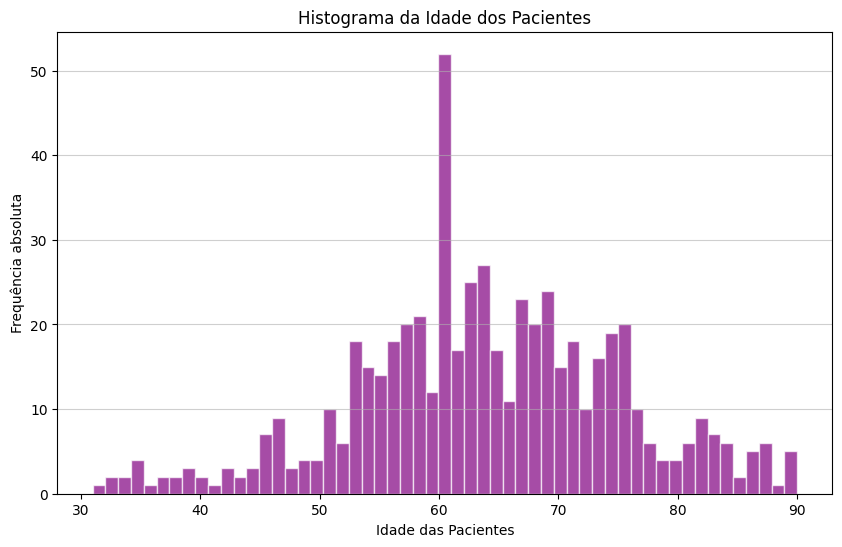

In [9]:
idade_pacientes = meta_amostras['age_at_index']

# Estatísticas descritivas
print("Estatísticas sumárias:\n", idade_pacientes.describe(), sep="")


# Caixa de bigodes
# Remocação dos valores omissos
if idade_pacientes.isnull().sum() > 0:

    idade_pacientes = idade_pacientes.dropna()

print("\nNúmero de amostras sem Nas:",idade_pacientes.shape[0])


# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(idade_pacientes, vert=False, patch_artist=True, notch=True, medianprops={'linewidth': 2, 'color': 'black'},
           showfliers=True, meanline=True, showmeans=True, meanprops={"linewidth":1, "color":"green"})
plt.xlabel('Idade dos Pacientes')
plt.ylabel('Distribuição')
plt.title('Caixa de bigodes da Idade dos Pacientes')
plt.grid(axis='x', linestyle='-', alpha=0.8)  
plt.show()


# Histograma
plt.figure(figsize=(10, 6))  
plt.hist(idade_pacientes, bins=55, edgecolor='white', alpha=0.7, color='purple')
plt.xlabel('Idade das Pacientes')  
plt.ylabel('Frequência absoluta')
plt.title('Histograma da Idade dos Pacientes')
plt.grid(axis='y', linestyle='-', alpha=0.6)

#### Teste de hipótese

**Nota:** para todos os testes de hipotese realizados, considerou-se um valor de prova igual a 0.05.

Através do boxplot "Idade do Paciente por Estádio FIGO" é possível verificar, visualmente, que a mediana das idades em pacientes com tumor no estádio IV é maior que as restantes, o que pode indicar uma relação entre a idade avançada e o estádio do tumor no que diz respeito à sua gravidade.
Entre os restantes estádios não se verifica, visualmente, uma diferença tão notória ao nível da mediana.

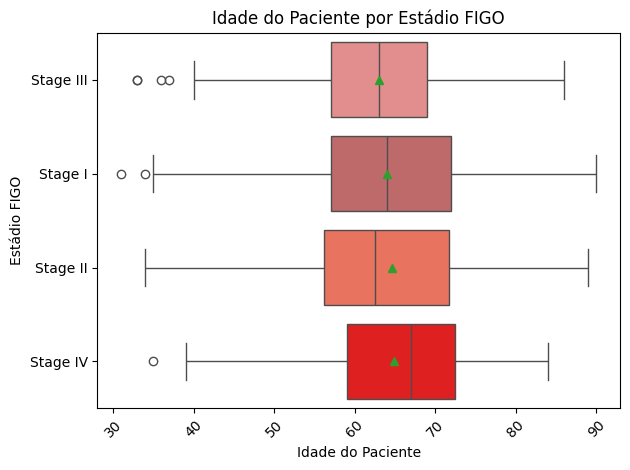

In [10]:
# Remoção das linhas com valores omissos
metados_sem_nas = meta_amostras.dropna()


# Criação do boxplot usando o package Seaborn
sns.boxplot(x="age_at_index", y="figo_stage", showmeans=True,  data=metados_sem_nas,
    palette=["lightcoral", "indianred", "tomato", "red"], orient="h")

plt.xlabel("Idade do Paciente")
plt.ylabel("Estádio FIGO")
plt.title("Idade do Paciente por Estádio FIGO")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Com o intuito de verificar se realmente existem diferenças significativas entre as médias das idades de acordo realizou um teste de anova one-way. No entato, primeiro verificou-se se os dados apresentam uma distribuição normal, uma vez que é necessário a normalidade dos dados para os resultados serem confiáveis

Shapiro-Wilk Teste:
Estatística de teste (W): 0.9915325793954219
p-value: 0.0023057538068824344
Rejeição da hipotese nula. A idade não apresenta uma distribuição normal.


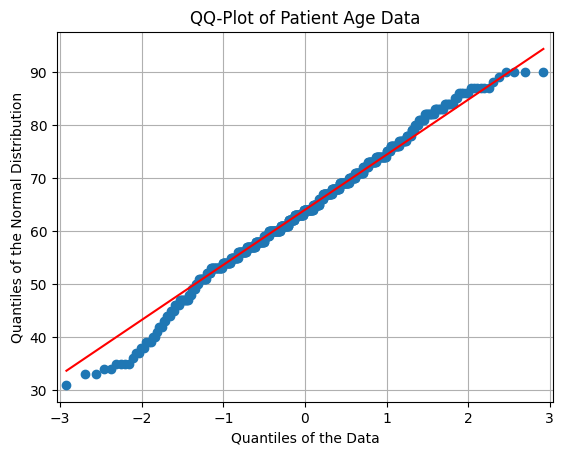


Bartlett Teste:
Estatística de teste (chi-squared): 3.436095238312762
p-value: 0.32914542304057687
Não é possível rejeitar a hipotese nula. As variâncias são homogeneas.


In [11]:
# Extração das idades
age_data = metados_sem_nas['age_at_index']


# Teste à normalidade dos dados (Shapiro-Wilk)
shapiro_test_result = stats.shapiro(age_data)


# Print estatística de teste e p-value
print("Shapiro-Wilk Teste:")
print("Estatística de teste (W):", shapiro_test_result[0])
print("p-value:", shapiro_test_result[1])


# Interpretação dos resultados
if shapiro_test_result[1] > 0.05:
    print("Não é possível rejeitar a hipotese nula. A idade apresenta distribuição normal.")
else:
    print("Rejeição da hipotese nula. A idade não apresenta uma distribuição normal.")


# QQ-Plot
sm.qqplot(age_data, line='q')
plt.xlabel('Quantiles of the Data')
plt.ylabel('Quantiles of the Normal Distribution')
plt.title('QQ-Plot of Patient Age Data')
plt.grid(True)
plt.show()


# Criação dos grupos de acordo com o FIGO stage
groups = metados_sem_nas.groupby('figo_stage')['age_at_index'].apply(list)


# Bartlett test
bartlett_test_result = stats.bartlett(*groups)


# Print estatística de teste e p-value
print("\nBartlett Teste:")
print("Estatística de teste (chi-squared):", bartlett_test_result[0])
print("p-value:", bartlett_test_result[1])


# Interpretação dos resultados
if bartlett_test_result[1] > 0.05:
    print("Não é possível rejeitar a hipotese nula. As variâncias são homogeneas.")
else:
    print("Rejeição da hipotese nula. As variâncias não são homogeneas.")
    

Através do **shapiro.test()** verificou-se que os dados da variável "age_at_index" não são normais (p.value\<0.05).
No entanto, através da análise do Q-Q Plot, com sobreposição da linha qqline, verificou-se que os pontos estão, na sua maioria, sobrepostos à linha diagonal e apenas as extremidades se afastam abaixo e acima da diagonal.
Para além disso, estamos perante um grande volume de dados (n=574), ou seja, de acordo com o teorema do limite central, aceita-se a normalidade dos dados apesar de o valor de p-value do teste de shapiro resultar na rejeição da hipótese nula.
Garantindo a normalidade e a homogenidade das variâncias, procedeu-se à análise **anova one way** para verificar se existem ou não diferenças significativas na média das idades dos pacientes entre os diferentes estádios e obteve-se um valor de prova de 0.722, o que não permite rejeitar a hipótese nula, ou seja, não há diferenças significativas na média das idades dos pacientes entre os diferentes estádios.

                     sum_sq     df         F    PR(>F)
C(figo_stage)    166.522794    3.0  0.443443  0.722035
Residual       71349.290794  570.0       NaN       NaN
Não existem diferenças estatisticamente significativas na media das idades entre os vários grupos.


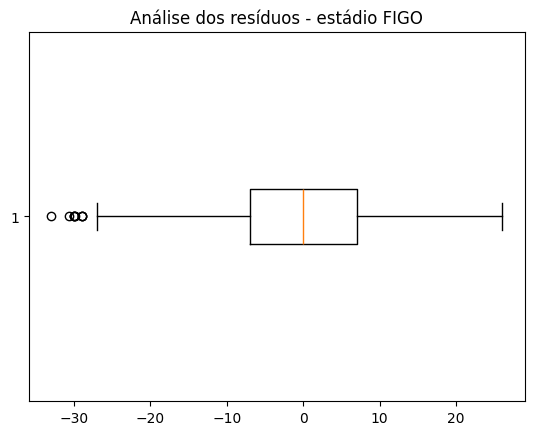

In [12]:
model = ols.ols('age_at_index ~ C(figo_stage)', data=metados_sem_nas).fit()
aov_table = sm.stats.anova_lm(model, typ=2)


# Print dos resultados da ANOVA
print(aov_table)


# Interpretação dos resultados
if aov_table['PR(>F)'][0] < 0.05 :
    print("Existem diferenças estatisticamente significativas na media das idades entre os vários grupos.")
else:
    print("Não existem diferenças estatisticamente significativas na media das idades entre os vários grupos.")


# Plot dos resíduos
plt.boxplot(model.resid, vert=False)
plt.title("Análise dos resíduos - estádio FIGO")
plt.show()

Procedeu-se à realização do teste não paramétrico **kruskal.test()** para concluir se os resultados seriam os mesmos e, mais uma vez, obtivemos um valor de prova de 0.6632 que não permite rejeitar a hipótese de que não há diferenças significativas na média das idades dos pacientes entre os diferentes estádios.

In [13]:
# Criação dos vários grupos
groups = metados_sem_nas.groupby('figo_stage')['age_at_index'].apply(list)


# Kruskal test
kruskal_test_result = stats.kruskal(*groups)


# Print dos resultados
print("\nKruskal teste:")
print("Estatística de teste (chi-squared):", kruskal_test_result[0])
print("p-value:", kruskal_test_result[1])


# Interpretação dos resultados
if kruskal_test_result[1] > 0.05:
    print("Não é possível rejeitar a hipotese nula. As médias das idades dos pacientes não apresenta diferenças estatisticamente significativas.")
else:
    print("Rejeição da hipotese nula. As médias das idades dos pacientes nos diferentes estádios é estastisticamente diferente.")



Kruskal teste:
Estatística de teste (chi-squared): 1.5833877308389992
p-value: 0.6631623788102903
Não é possível rejeitar a hipotese nula. As médias das idades dos pacientes não apresenta diferenças estatisticamente significativas.


No que diz respeito ao estado de sobrevivência dos pacientes, vital_status, visualmente é transmitida a ideia de que os pacientes que já faleceram tinham uma idade mais avançada.
Através do teste anova one way, para as hipóteses definidas verificou-se que a hipótese nula é rejeitada (p value= 6.13e-05), ou seja, existem diferenças estatisticamente significativas entre a idade dos pacientes nos diferentes grupos "Alive" e "Dead".

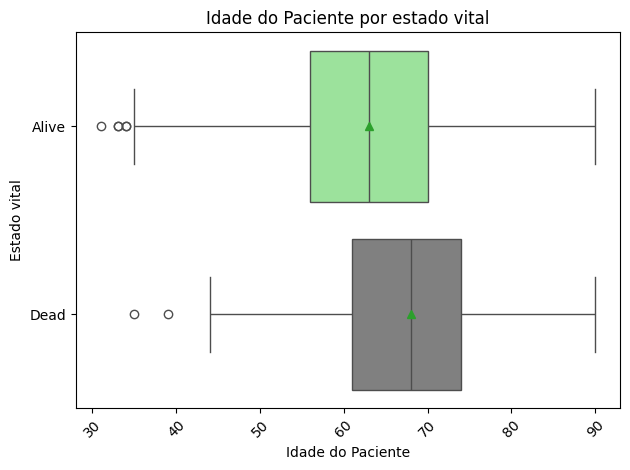

Estatística de teste: -4.0378220054249505
P-value: 6.130334017448354e-05
Existe diferença estatisticamente significativa entre a média das idades do grupo Alive e Dead.


In [14]:
# Criação do box plot das idades em função do estado vital
sns.boxplot( x="age_at_index", y="vital_status", showmeans=True,
    data=metados_sem_nas, palette=["lightgreen", "gray"])


plt.xlabel("Idade do Paciente")
plt.ylabel("Estado vital")
plt.title("Idade do Paciente por estado vital")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Criação dos diferentes grupos
alive = metados_sem_nas[metados_sem_nas['vital_status'] == 'Alive']['age_at_index']
dead = metados_sem_nas[metados_sem_nas['vital_status'] == 'Dead']['age_at_index']


# t teste
t_stat, p_value = stats.ttest_ind(alive, dead)


print(f"Estatística de teste: {t_stat}")
print(f"P-value: {p_value}")


# Interpretação dos resultados
if p_value < 0.05:
    print("Existe diferença estatisticamente significativa entre a média das idades do grupo Alive e Dead.")
else:
    print("Não existe diferenças significativas entre a média das idades do grupo Alive e Dead.")

Realizou-se também para este caso o teste não paramétrico kruskal.test() e obtivemos um valor de prova de 0.0001071 que leva à rejeição da hipótese de que não há diferenças significativas na média das idades dos pacientes entre os diferentes estados de vida ("Alive" e "Dead").

In [15]:
# Criação dos grupos 
groups = metados_sem_nas.groupby('vital_status')['age_at_index'].apply(list)


# Kruskal teste
kruskal_test_result = stats.kruskal(*groups)

# Print dos resultados
print("Kruskal teste:")
print("Estatística de teste (chi-squared):", kruskal_test_result[0])
print("p-value:", kruskal_test_result[1])


# Interpretação dos resultados
if kruskal_test_result[1] < 0.05:
     print("Existe diferenças estatisticamente significativas entre as as médias das idades do grupo Alive e Dead.")
else:
    print("Não existe uma diferença estatisticamente significativa entre as as médias das idades do grupo Alive e Dead.")

Kruskal teste:
Estatística de teste (chi-squared): 15.0078745671541
p-value: 0.00010706349345038721
Existe diferenças estatisticamente significativas entre as as médias das idades do grupo Alive e Dead.


### Análise de expressão diferencial 

#### PyDESeq2

Com o intuito de proceder à análise dos genes que se encontram diferencialmente expressos no tumor "Endometrioid adenocarcinoma, NOS" em função do estádio FIGO da paciente procedeu-se ao pré-processamento dos dados de modo a facilitar e otimizar a análise diferencial reduzindo o tempo e os recursos computacionais necessários.
Numa primeira fase, realizou-se a filtragem das amostras que possuem diagnóstico primário "Endometrioid adenocarcinoma, NOS", já que apenas estas amostras representam relevância para o nosso estudo. Em seguida, avaliou-se a eventual presença de valores omissos ao nível da variável do estádio FIGO e, uma vez que não existem valores omissos realizou-se a filtragem das amostras nos dados de expressão genética, passando de 589 amostras para apenas 423 amostras de interesse.

Embora se tenha realizado uma filtragem ao nível das amostras, uma vez que o dataset possui cerca de 61 mil genes analisados, é importante realizar uma filtragem de modo a remover genes que apresentam expressão ausente, isto é, genes que não possuem nenhuma amostra com expressão e, além disso, é também interessante remover genes que possuem um baixo nível de expressão, uma vez que estes genes não permitem retirar informações relevantes acerca da expressão diferencial. Para isso eliminou-se do dataset todos aqueles genes que não possuíam pelo menos 20 counts em pelo menos 4 amostras, sendo que estes parâmetros são considerados standard, segundo o workflow apresentado na documentação do [DESeq2](https://shorturl.at/nyLT0).
Após a etapa do pré-processamento, o dataset final apresenta cerca de 36 mil genes e 423 amostras e, com o dataset filtrado, realizou-se a criação do objeto **DESeqDataSet**, através do package **PyDESeq2** em que se utilizou o fator "figo_stage" como uma variável explicativa do modelo. Após a criação do objeto DESeqDataSet, procedeu-se à estimativa da dispersão e do log2FoldChange.

In [16]:
# Remoção das amostras que possui valores omissos para primary_diagnosis
amostras_filtradas = meta_amostras.dropna(subset=['primary_diagnosis'])


# Seleção das amostras com primary_diagnosis igual a "Endometrioid adenocarcinoma, NOS"
amostras_filtradas = amostras_filtradas[amostras_filtradas['primary_diagnosis'] == "Endometrioid adenocarcinoma, NOS"]


# Contar o número de valores NaN na coluna 'vital_status' de amostras_filtradas
num_na_vital_status = amostras_filtradas['figo_stage'].isna().sum()
print("Número de amostras com valores omissos na variável figo_stage:",num_na_vital_status)


# Selecionar dados de expressão gênica correspondentes às amostras filtradas
dados_EA = gene_exp.loc[:, amostras_filtradas.index]


# Dimensão dos dados_EA
print("Dimensão do dataframe de expressão genética com as amostras filtradas:",dados_EA.shape)


# Remoção dos genes com menos de 20 contagens em pelo menos 4 amostras
genes_manter = dados_EA[dados_EA >= 20].sum(axis=1) >= 4
dados_EA = dados_EA[genes_manter] 
print("Dimensão do dataframe filtrado (genes e amostras):",dados_EA.shape) 


# Transposta da matriz de contagens, necessário para o package pydeseq2
dados_EA_t = dados_EA.T


# Extração dos metadados referentes ao figo stage
figo = pd.DataFrame(amostras_filtradas["figo_stage"])


# Criação do objeto deseq
dds = DeseqDataSet(counts=dados_EA_t, metadata=amostras_filtradas, design_factors="figo_stage")
# dds.X  para ver a matriz de contagens
# dds.var para ver os genes ids


# Correr a  estimativa da dispersão e LFCs
# atenção a variavel figo_stage passa a ser figo-stage, o package altera a variável
dds.deseq2()

Número de amostras com valores omissos na variável figo_stage: 0
Dimensão do dataframe de expressão genética com as amostras filtradas: (60660, 423)
Dimensão do dataframe filtrado (genes e amostras): (35982, 423)


C:\Users\ricar\AppData\Local\Temp\ipykernel_2060\421311258.py:37: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts=dados_EA_t, metadata=amostras_filtradas, design_factors="figo_stage")
Fitting size factors...
... done in 1.00 seconds.

Fitting dispersions...
... done in 28.26 seconds.

Fitting dispersion trend curve...
... done in 1.61 seconds.

Fitting MAP dispersions...
... done in 30.46 seconds.

Fitting LFCs...
... done in 24.21 seconds.

Replacing 6667 outlier genes.

Fitting dispersions...
... done in 5.31 seconds.

Fitting MAP dispersions...
... done in 5.53 seconds.

Fitting LFCs...
... done in 5.09 seconds.



Em seguida, após a reaização das estimativas de dispersão e de mudança de dobra, retirou-se as estimativas e selecionou-se as categorias da estádio FIGO que se pretende analisar, para a nossa análise optou-se por analisar as estimativas entre o estádio I e o estádio IV que correspondem ao estado mais leve e a forma mais grave de cancro, respetivamente. Em seguida utilizou-se o metódo summary do **PyDESeq2** para se realizar os testes estatísticos de Wald de modo a identificar aqueles genes que, segundo as estimativas, se encontram diferencialmente expressos nos grupos em estudo.

In [23]:
# Retirar as estatísticas da análise diferencial
stat_res = DeseqStats(dds,contrast=["figo-stage","Stage I","Stage IV"])


# Realização dos testes Wald para encontrar os genes diferencialmente expressos
stat_res.summary()


# Atribuição dos resultados do teste Wald à variavel res
res =stat_res.results_df


Running Wald tests...
... done in 15.37 seconds.



Log2 fold change & Wald test p-value: figo-stage Stage I vs Stage IV
                          baseMean  log2FoldChange     lfcSE      stat  \
row.names(geneExp_df)                                                    
ENSG00000000003.15     2514.763645        0.122307  0.181285  0.674664   
ENSG00000000005.6         3.148786        0.221056  0.685811  0.322328   
ENSG00000000419.13      690.182327       -0.278573  0.176900 -1.574750   
ENSG00000000457.14      422.132337        0.611937  0.186702  3.277608   
ENSG00000000460.17      204.499079        0.322030  0.227085  1.418103   
...                            ...             ...       ...       ...   
ENSG00000288658.1        20.880969       -0.616013  0.410265 -1.501501   
ENSG00000288660.1         1.094814       -0.928499  0.794148 -1.169177   
ENSG00000288663.1        19.182492        0.029071  0.270874  0.107323   
ENSG00000288670.1       114.543897        0.101566  0.191775  0.529610   
ENSG00000288675.1        33.418770       -0

O dataframe dos genes diferencialmente expressos possui cerca de 36 mil genes e 6 colunas onde estão apresentadas as várias estimativas e as estatísticas do teste Wald. A coluna baseMean representa a média normalizada das contagens para todas as amostras. A coluna log2FoldChange avalia a diferença da expressão em logaritmo de base 2 entre os dois grupos comparados neste caso "Stage I" e "Stage IV" e, por fim, o valor de pvalue representa a probabilidade de o valor de log fold changes calculado ser resultado do acaso.

No entanto ainda não se procedeu á filtragem dos genes que na verdade não se encontram diferencialmente expressos, uma vez que o teste Wald apenas realiza os testes estatísticos para todos os genes e procede à filtragem dos genes diferencialmente expressos. Para isso, primeiro filtrou-se aqueles genes que possuem baixa expressão tendo-se removido todos aqueles que possuem valores de baseMean inferiores a 10. Em seguida, removeu-se todos os genes que não possuem valor de padj inferior a 0.05 e que não tem uma variação de log2FoldChange superior a 0.5. Com esta filtragem, garante-se que apenas os genes diferencialmente expressos estão presentes no dataframe res e verificou-se que agora apenas possui cerca de 1200 genes diferencialmente expressos. Em seguida, procedeu-se a ordenação dos genes por ordem crescente de padj, uma vez que aqueles genes que estarão mais diferencialmente expressos são os que possuem menor valor de padj.
Pela análise do dataframe ordenado, verificou-se que o genes mais diferencialmente expresso foi o gene com o ENSEMBLE id **ENSG00000143632.14** que corresponde ao gene ACTA1. A análise das estatístias e das estimativas leva a concluir que este gene está sub expresso nas pacientes do estádio IV, o que parece ser concordante com a informação contida na literatura que parece indicar este gene como um potencial repressor tumural que quando possui uma diminuição da sua expressão resulta num progrenóstico de recuperação e sobrevivência muito reservada estando também associado ao desenvolvimento de metasteses [5].

In [91]:
print("Dimensões do dataframe dos genes diferencialmente expressos (genes,colunas)",res.shape)


# Remoção de genes com baixa expressão
res = res[res["baseMean"] >= 10]
print("Dimensões do dataframe com a remoção dos genes pouco expressos",res.shape)


# Seleção dos genes diferencialmente expressos com variação de logfoldchange maior a 0.5
diferencialmente_expressos = res[(res.padj < 0.05) & (abs(res.log2FoldChange)>0.5)]
print("Genes diferencialmente expressos entre o Stage I e Stage IV:",diferencialmente_expressos.shape[0])


# Guardar os resultados da análise de expressão diferencial
diferencialmente_expressos.to_excel("../Data/diferencialmente_expressos.xlsx")


# Ordenar os genes por ordem crescente de padj, ou seja, dos mais diferencialmente expressos para os menos
res_ord_padj= diferencialmente_expressos.sort_values(by="padj", ascending=True)
res_ord_padj.head()

Dimensões do dataframe dos genes diferencialmente expressos (genes,colunas) (19747, 6)
Dimensões do dataframe com a remoção dos genes pouco expressos (19747, 6)
Genes diferencialmente expressos entre o Stage I e Stage IV: 1162


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
row.names(geneExp_df),,,,,,
ENSG00000143632.14,22.026732,-3.298306,0.358766,-9.193470,3.803681e-20,1.023685e-15
ENSG00000158104.11,26.675424,-4.002130,0.444171,-9.010327,2.054429e-19,2.594045e-15
ENSG00000127743.6,18.609925,-4.119381,0.459098,-8.972766,2.891590e-19,2.594045e-15
ENSG00000108309.14,49.340850,-3.780066,0.455052,-8.306894,9.823972e-17,6.609814e-13
ENSG00000007171.18,33.262344,-4.121946,0.518490,-7.949905,1.866552e-15,1.004690e-11


A visualização dos resultados é possível através do plotMA.
No gráfico, os pontos representados a vermelho correspondem aos genes que são diferencialmente expressos sendo que, os pontos que se encontram em valores positivos de "log fold change" correspondem aos genes que são sobrexpressos para a condição "Stage IV" enquanto que os pontos localizados para valores negativos identificam os genes que são subexpressos na condição "Stage IV" e por isso são considerados sobrexpressos na condição "Stage I". Por outro lado, os pontos a cinza representam os genes que não são diferencialmente expressos, e, por este gráfico, conclui-se que grande parte dos genes em estudo não sofrem variações estatisticamente significativas para serem considerados diferenciais, o que está de acordo com o que seria expectável.
É ainda possível verificar-se uma grande dispersão dos pontos vermelhos, sobretudo para os genes sobreexpressos na condição "Stage IV" sugerindo que existe uma variabilidade considerável na expressão diferencial.

<Figure size 1000x600 with 0 Axes>

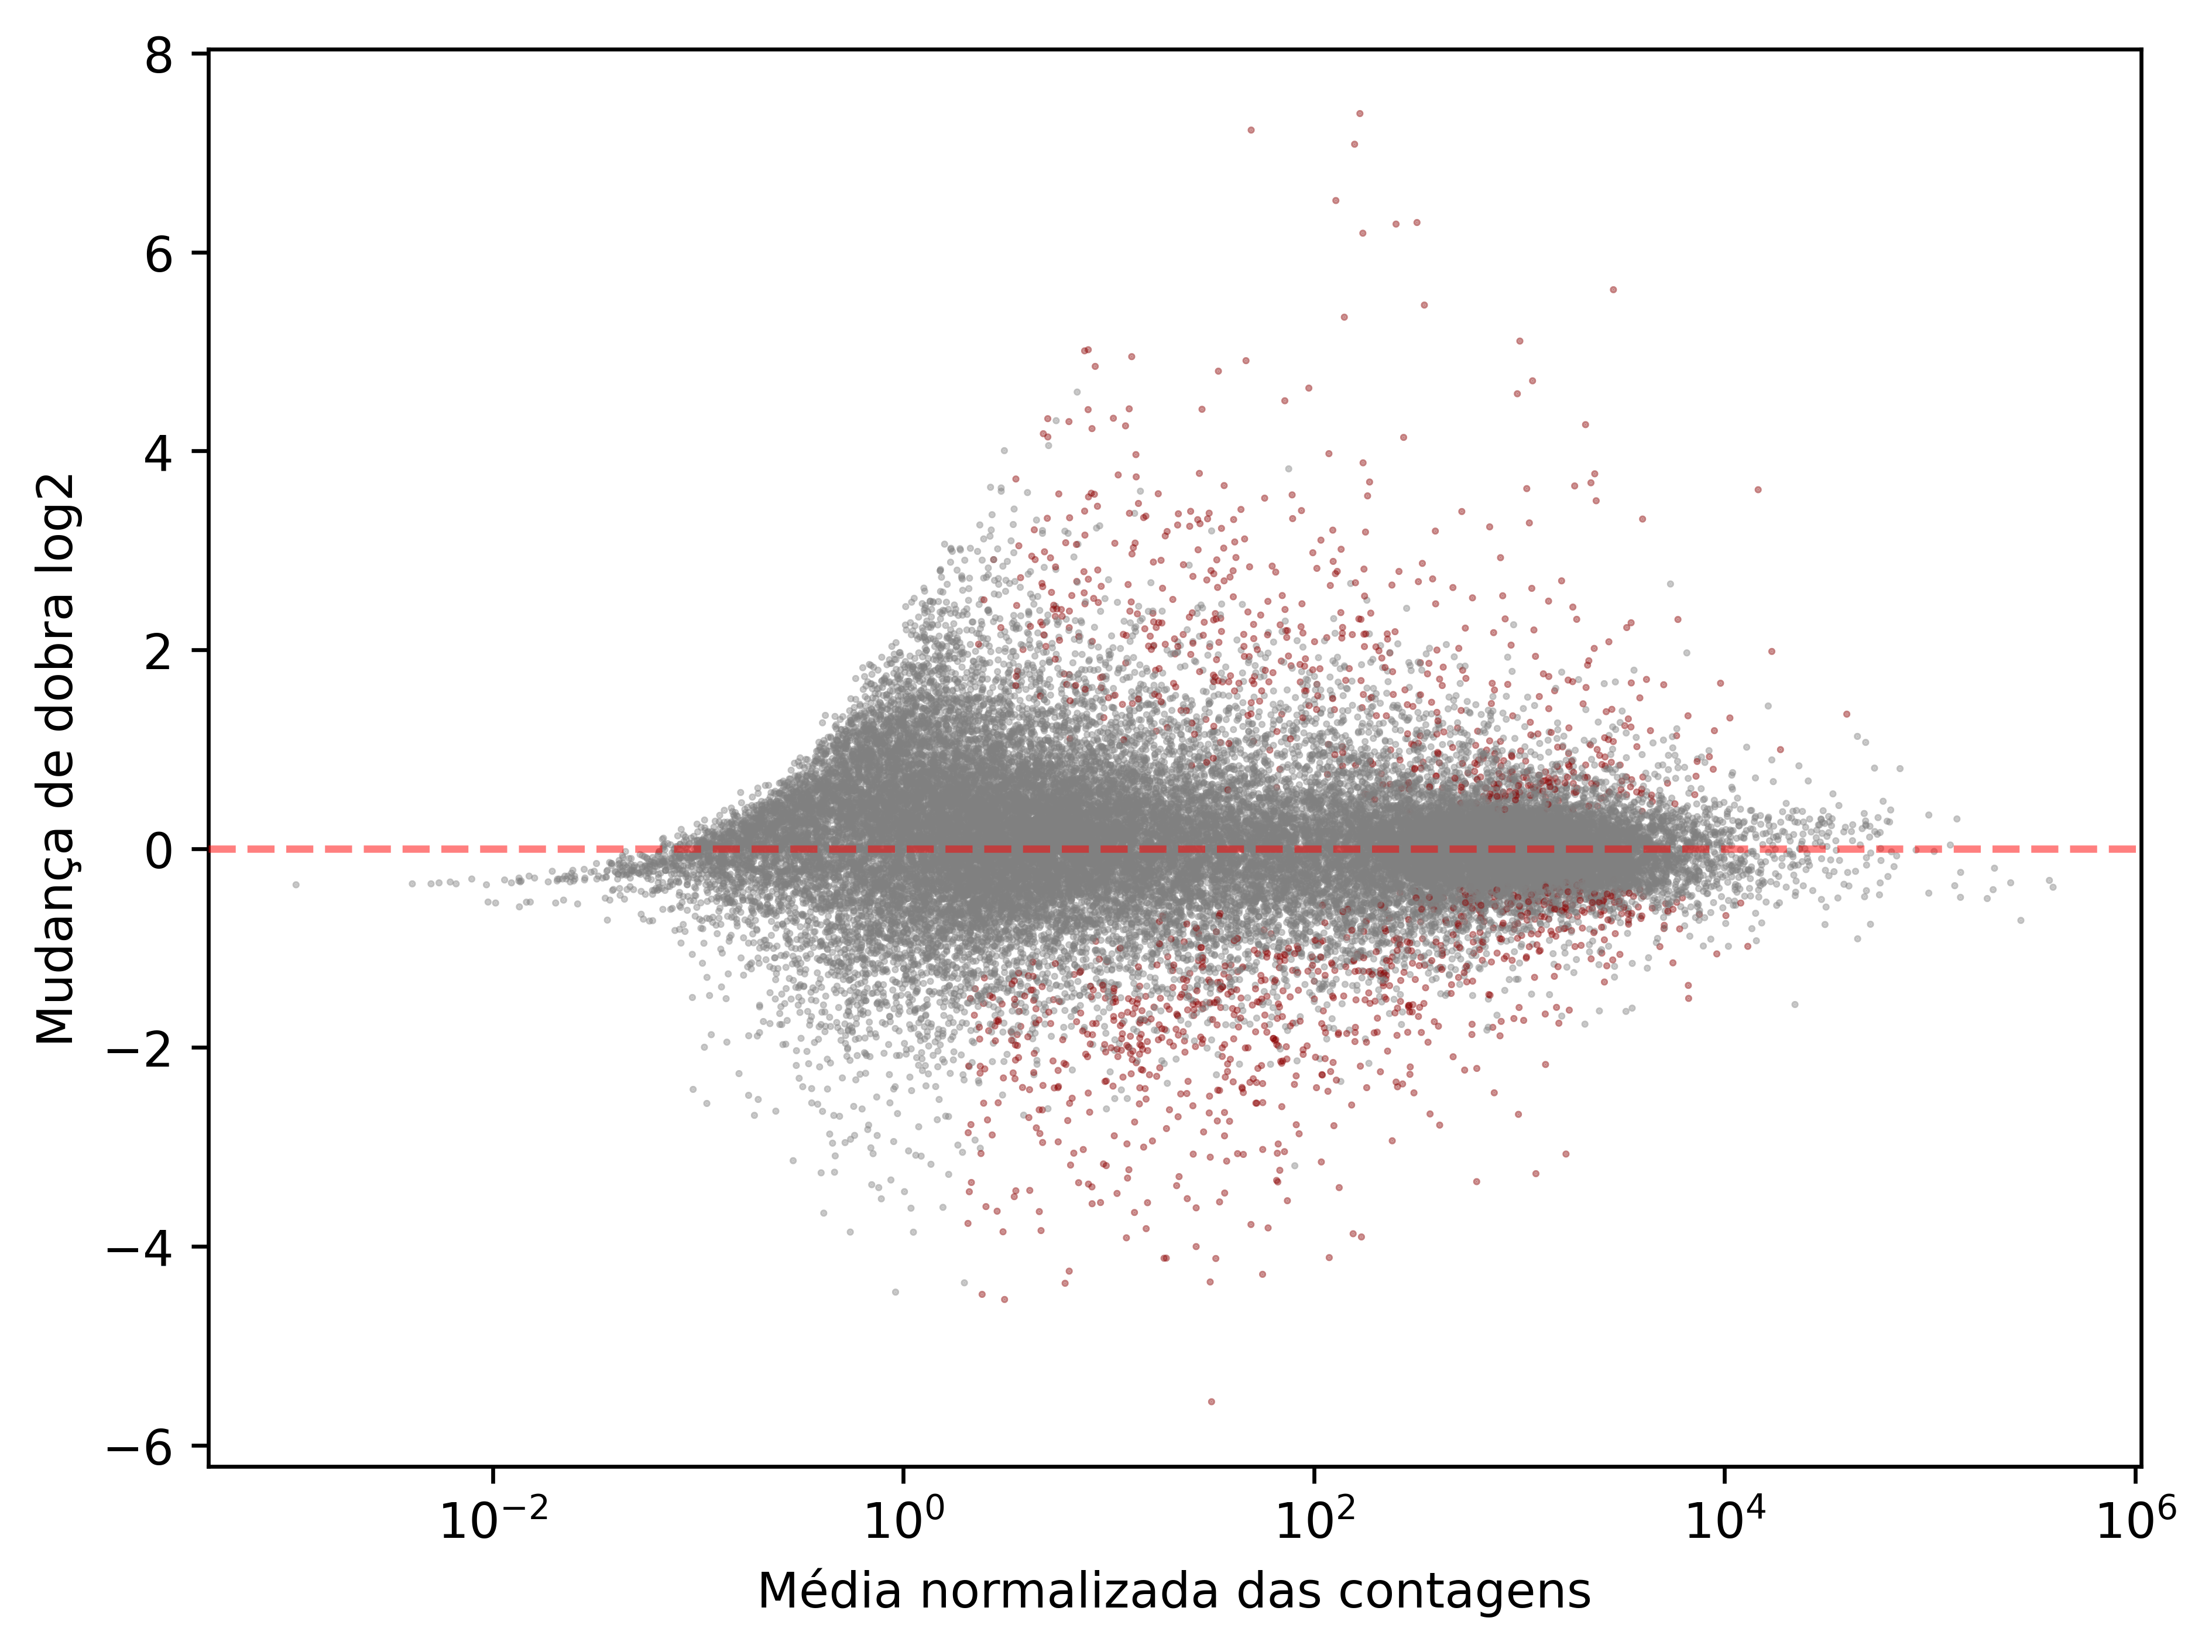

In [27]:
# Visualização dos resultados através do gráfico plot MA
plt.figure(figsize=(10,6))
stat_res.plot_MA()
plt.xlabel("Média normalizada das contagens")
plt.ylabel("Mudança de dobra log2")

plt.show()

No gráfico abaixo estão representados os genes por ordem descendente de mudança de dobra log2. E por este gráfico é possível verificar que o gene que possui o maior valor de mudança de dobra (log2) é o gene com o ENSEMBLE id **ENSG00000163209.15**, sendo que o gene que possui o maior valor negativo de mudança de dobra (log2) é o gene **ENSG00000173404.5**

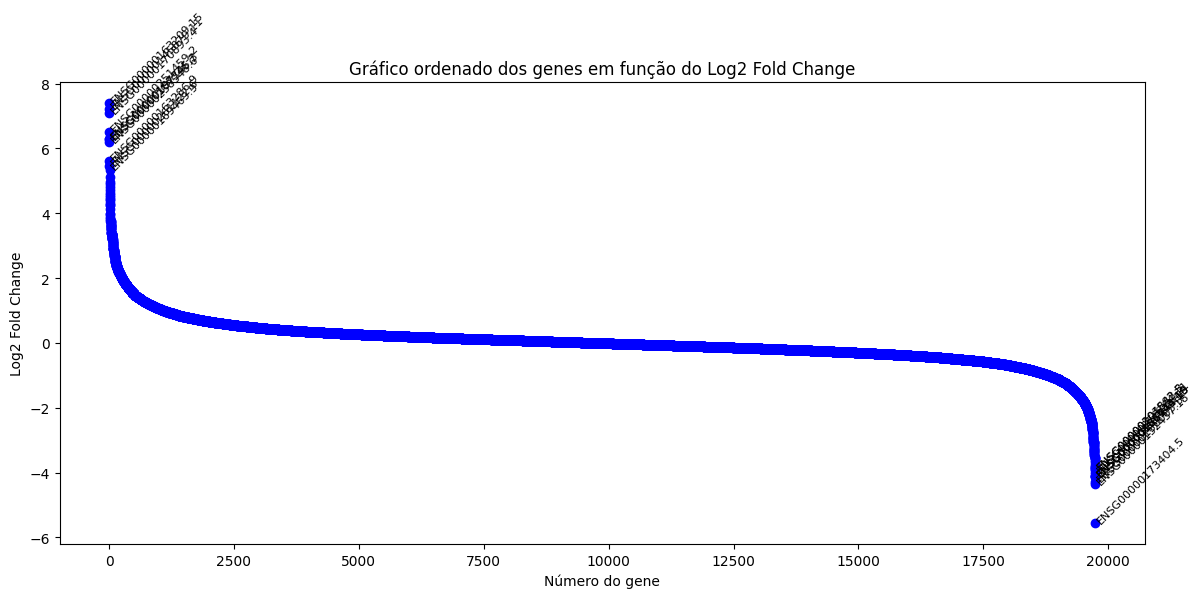

                         baseMean  log2FoldChange     lfcSE      stat  \
row.names(geneExp_df)                                                   
ENSG00000163209.15     167.405681        7.394250  1.216940  6.076102   
ENSG00000145879.11      49.446014        7.228039  1.600450  4.516254   
ENSG00000170893.4      157.715413        7.085789  1.089382  6.504411   
ENSG00000251459.2      127.825046        6.519396  0.941550  6.924112   
ENSG00000197745.3      317.521733        6.298251  1.016636  6.195189   

                             pvalue          padj  
row.names(geneExp_df)                              
ENSG00000163209.15     1.231393e-09  9.747198e-07  
ENSG00000145879.11     6.294302e-06  8.065353e-04  
ENSG00000170893.4      7.799855e-11  1.234809e-07  
ENSG00000251459.2      4.387172e-12  1.180720e-08  
ENSG00000197745.3      5.821531e-10  5.734343e-07  


                         baseMean  log2FoldChange     lfcSE      stat  \
row.names(geneExp_df)                            

In [34]:
# Vizualiação dos resultados orgenados por ordem decrescente de mudança de dobra
# considera se não será melhor ordenar por padj, visto que este é que indica o genes que são mais diferencialmente expressos
res_ord = res.sort_values(by='log2FoldChange', ascending=False)

# Preparar os dados para o plot
ranked_genes = res_ord['log2FoldChange'].values
gene_names = res_ord.index.to_list()


# Criação do plot
plt.figure(figsize=(14, 6))
plt.plot(ranked_genes, 'bo')
plt.xlabel('Número do gene')
plt.ylabel('Log2 Fold Change')
plt.title('Gráfico ordenado dos genes em função do Log2 Fold Change')


# Destaque dos genes mais e menos diferencialmente expressos
for i, gene in enumerate(gene_names[:10]):
    plt.text(i, ranked_genes[i], gene, fontsize=8, rotation=45)
for i, gene in enumerate(gene_names[-10:]):
    plt.text(len(ranked_genes) - 10 + i, ranked_genes[-10 + i], gene, fontsize=8, rotation=45)

plt.show()

print(res_ord.head())
print("\n\n",res_ord.tail())

#### Scanpy

O Scanpy é um poderoso package de python desenvolvido especificamente para analisar dados de expressão gênica de célula única (scRNA-seq), oferecendo um conjunto abrangente de funcionalidades para as várias etapas do fluxo de trabalho de análise scRNA-seq, tornando-se uma escolha popular entre pesquisadores nesta área. No entanto esta ferramenta pode lidar com dados de RNA-seq em massa de maneira limitada. Com o intuito de testarmos de testarmos a aplicabilidade deste package aos nossos dados, realizou-se a análise de expressão diferencial mantendo a variavel explicativa do modelo o estádio FIGO. No entanto, é de ressalvar que as conclusões retiradas desta análise podem não ser as mais corretas, uma vez que a ferramenta não foi projetada para este intuito.

In [10]:
#transposta de dados_EA para atribuição ao objeto adata
adata = sc.AnnData(dados_EA.T)


# Filtrar células e genes de baixa qualidade
sc.pp.filter_cells(adata, min_genes=20)
sc.pp.filter_genes(adata, min_cells=4)


# Normalizar os dados
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


adata.obs['condition'] = amostras_filtradas['figo_stage'].values
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
# Substituir valores negativos por zero (ou outro valor positivo pequeno), isto porque ao fazer scale dos dados podemos obter valores negativos
adata.X = np.where(adata.X < 0, 0.1, adata.X)

In [17]:
# Definir a condição a ser analisada
adata.obs['condition'] = adata.obs['condition'].astype('category')

# Realizar a análise de expressão diferencial
sc.tl.rank_genes_groups(adata, groupby='condition', method='wilcoxon', groups=['Stage IV'], reference='Stage I')

# Obter os resultados
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names

# Converter os resultados para DataFrame
de_genes = pd.DataFrame({group: result['names'][group] for group in groups})
de_pvals = pd.DataFrame({group: result['pvals'][group] for group in groups})
de_logfoldchanges = pd.DataFrame({group: result['logfoldchanges'][group] for group in groups})

# Supondo que você está interessado na comparação 'alive' vs 'dead'
group_of_interest = 'Stage IV'

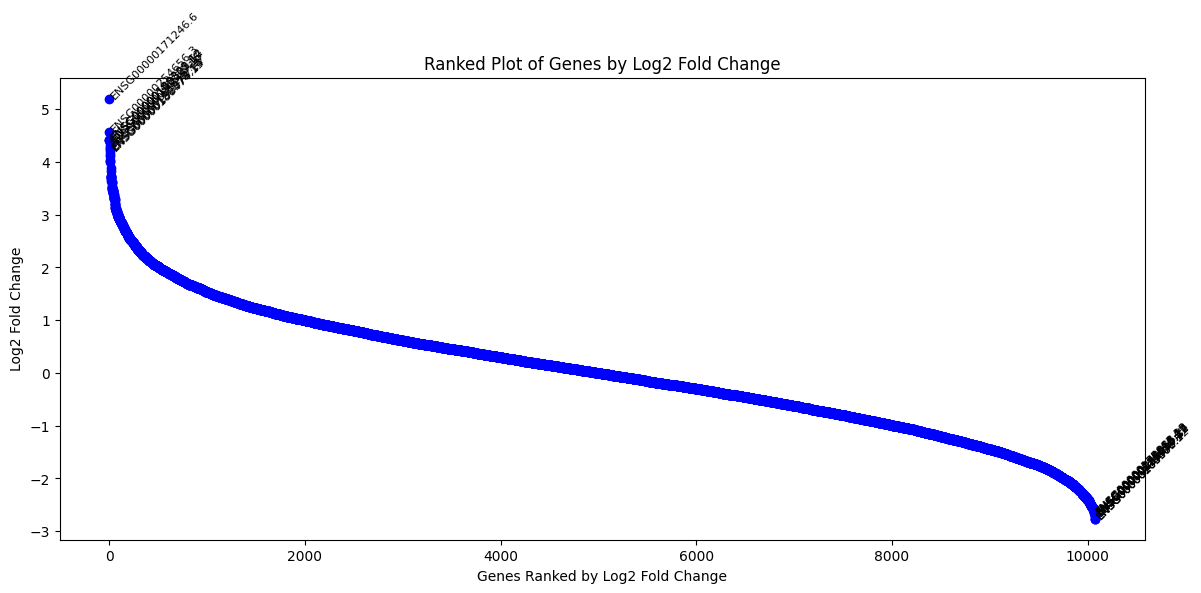

In [18]:
# Converter os resultados para DataFrame
de_genes = pd.DataFrame(result['names'])
de_logfoldchanges = pd.DataFrame(result['logfoldchanges'])
de_pvals = pd.DataFrame(result['pvals_adj'])  # Usar p-values ajustados se disponíveis

# Selecionar o grupo de interesse
group_of_interest = 'Stage IV'

# Preparar os dados para o plot
log2FoldChange = de_logfoldchanges[group_of_interest].values
gene_names = de_genes[group_of_interest].values

# Criar o DataFrame consolidado
resultados = pd.DataFrame({
    'log2FoldChange': log2FoldChange,
    'gene_name': gene_names
})

# Ordenar os resultados pela alteração na expressão em ordem decrescente
resultados_ord = resultados.sort_values(by='log2FoldChange', ascending=False)

# Preparar os dados para o plot
ranked_genes = resultados_ord['log2FoldChange'].values
gene_names = resultados_ord['gene_name'].values

# Plotar
plt.figure(figsize=(14, 6))
plt.plot(ranked_genes, 'bo')
plt.xlabel('Genes Ranked by Log2 Fold Change')
plt.ylabel('Log2 Fold Change')
plt.title('Ranked Plot of Genes by Log2 Fold Change')

# Marcar os genes mais expressos e menos expressos
for i, gene in enumerate(gene_names[:10]):
    plt.text(i, ranked_genes[i], gene, fontsize=8, rotation=45)
for i, gene in enumerate(gene_names[-10:]):
    plt.text(len(ranked_genes) - 10 + i, ranked_genes[-10 + i], gene, fontsize=8, rotation=45)

plt.show()

In [19]:
resultados_ord['gene_name'] #imprimir os nomes dos genes ordenados de acordo com o log fold change em ordem decrescente"

106       ENSG00000171246.6
1321      ENSG00000254656.3
230      ENSG00000108309.14
33       ENSG00000132821.12
67        ENSG00000140323.6
                ...        
10017    ENSG00000125434.11
9983      ENSG00000114638.8
10027     ENSG00000163501.7
10080    ENSG00000164488.12
10044     ENSG00000260676.5
Name: gene_name, Length: 10081, dtype: object

Através da análise dos gráficos, podemos ver que o gene **ENSG00000171246.6** é o que se encontra mais expresso para a condição de estadio IV do tumor (tendo como comparativo o estadio I). Este gene pode ser acedido no ENSEMBl gene através do seu identificador, onde é descrito como codificador de uma proteína, **NPTX1** (neuronal pentraxin 1). Após uma breve pesquisa na literatura existente, estudos apontam para a envolvência de NPTX1 em processos de indução de apoptose em diferentes tipos celulares. Um estudo conduzido em 2014, cujo objetivo foi entender como os contraceptivos progestativos afetam as células do endométrio, revelou que em mulheres que receberam contracetivos progestativos de longa duração se observou um aumento na expressão de NPTX1 no endométrio e que, o aumento da expressão de NPTX1 estava associado à indução de apoptose (morte celular programada) em células endoteliais do endométrio(Guzeloglu-Kayisli et al., 2014). Ou seja, os achados relacionados à expressão aumentada de NPTX1 e sua indução de apoptose nas células endoteliais podem fornecer insights importantes sobre os processos biológicos subjacentes a distúrbios uterinos. Relacionando com o nosso dataset, estes achados podem de facto fazer sentido, uma vez que o aumento da apoptose das células endoteliais e a instabilidade vascular podem facilitar a invasão tumoral e a disseminação metastática do câncer de endométrio. 


Por outro lado, através do comando **resultados_ord['gene_name']** vemos que o gene que se encontra menos expresso para a condição de estadio IV do tumor (tendo como comparativo o estadio I) é o gene **ENSG00000260676.5**. Também conhecido como "Uterine Endometrial Carcinoma-Associated Transcript", este gene, **LINC01541**, é uma sequência de RNA longo que não codifica proteínas e está localizado em um região intergênica do genoma. Um estudo cujo objetivo foi investigar o papel do gene LINC01541 na endometriose, revelou que o silenciamento de LINC01541 (redução da expressão) aumentou significativamente as capacidades migratórias e invasivas das células para tecidos circundantes, ou seja, as células tornaram-se mais propensas a se moverem e invadirem outros tecidos (Mai et al., 2019). Desta forma, no contexto do nosso dataset, os resultados obtidos na expressão diferencial parecem fazer sentido, isto é, uma vez que estamos a observar a expressão génica para a condição de estadio IV do tumor, que representa a forma mais agressiva do tumor onde há extensão do tumor para estruturas adjacentes, seria de esperar que este gene se encontra-se subexpresso e é, efetivamente, o que verficamos. 

# 2ª parte

## Análise não supervisionada

### Redução da dimensionalidade
As técnicas Principal Component Analysis (PCA) e t-Distributed Stochastic Neighbor Embedding (t-SNE) são duas técnicas de redução de dimensionalidade amplamente utilizadas na análise de dados. Ambas têm como objetivo reduzir a complexidade dos dados, eliminando a redundância (muito caraterísitca em datasets desta natureza) permitindo a visualização e a compreensão de padrões ou estruturas subjacentes. Muitas vezes, é útil usar ambos em conjunto: PCA para uma visão geral dos dados e t-SNE para uma visualização mais detalhada e interpretação de padrões locais.


#### PCA

A Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade usada comumente em análise de dados. Esta técnica é utilizada para simplificar dados complexos, isto é dados com um elevado número de variáveis, através da identificação de um conjunto menor de variavéis que capturam a maioria das informações importantes nos dados originais. Essas novas variavéis são designadas de compunentes principais (PCs), sendo a primeira PC a mais representativa dos dados originais. A utilização apenas dos primerias PCs pode levar a uma redução considerável da dimensionalidade dos dados enquanto retém a maioria da informação dos dados originais, transformando a visualização e a análise de dados mais fácil de trabalhar


In [61]:
# Transposta do dataframe de expressão genética
dados_EA_transpostos = dados_EA.transpose()


# Normalização dos dados
array_data = preprocessing.scale(dados_EA_transpostos)
data_scale =  pd.DataFrame(array_data, index =dados_EA_transpostos.index , columns = dados_EA_transpostos.columns)


# Realização do PCA para 2 componentes principais
pca_cach = PCA(n_components=2)
pca_cach.fit(data_scale)
X_r = pca_cach.transform(data_scale)
print('Var. explicada: %s'% str(pca_cach.explained_variance_ratio_))
print('Soma:', round(sum(pca_cach.explained_variance_ratio_) * 100,2), "%")

Var. explicada: [0.18376039 0.10858308]
Soma: 29.23 %


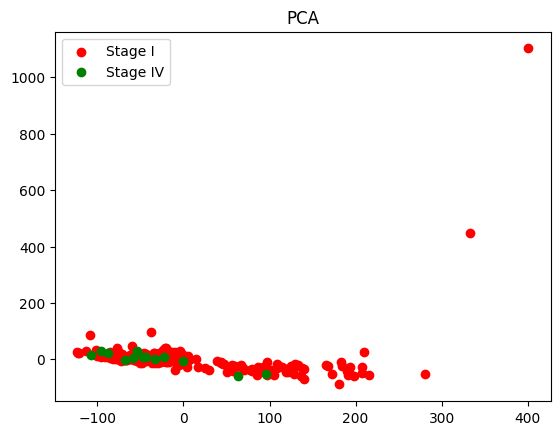

In [62]:
meta_values = amostras_filtradas["figo_stage"]
plt.figure()
for c, name in zip("rg", ["Stage I", "Stage IV"]):
    plt.scatter(X_r[meta_values == name, 0], X_r[meta_values == name, 1], c=c, label=name)
plt.legend()
plt.title('PCA')
plt.show()

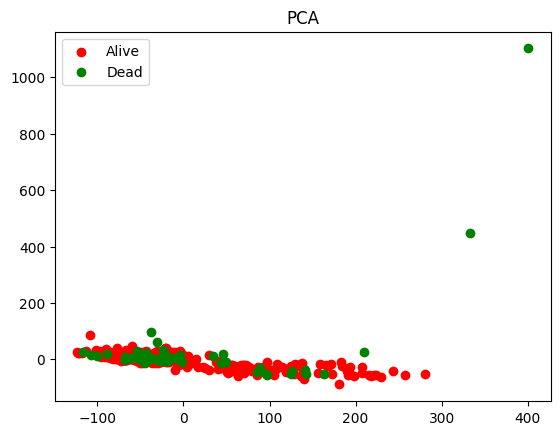

In [63]:
meta_values2 = amostras_filtradas["vital_status"]
plt.figure()
for c, name in zip("rg", ["Alive", "Dead"]):
    plt.scatter(X_r[meta_values2 == name, 0], X_r[meta_values2 == name, 1], c=c, label=name)
plt.legend()
plt.title('PCA')
plt.show()

<p align="justify">
Como se observar no primeiro e segundo gráficos, os dados são mostrados em função do "figo_stage" e em função do "vital_status" respetivamente, e, concluindo-se que estes não conseguem ser explicados por nenhuma das condições de metadados utilizada, uma vez que não há uma divisão clara entre os grupos. No entanto, devemos ressalvar que os os PC1 e PC2 apenas explicam 29.23% da variabilidade dos nossos dados, logo, não é possível retirar uma conclusão segura destes gráficos.
</p>

#### t-SNE

T-Distributed Stochastic Neighbor Embedding (t-SNE), é uma outra técnica de redução de dimensionalidade projetada especificamente para visualizar dados de alta dimensionalidade. Esta técnica, ao contrário do PCA, que se concentra em capturar a variância geral nos dados, visa preservar as similaridades entre pontos de dados próximos no espaço de alta dimensionalidade. Isso o torna particularmente adequado para visualizar relações complexas e não lineares dentro dos dados. Além disso, o t-SNE utiliza uma abordagem probabilística para mapear dados de alta dimensionalidade recorrendo a uma função objetivo para medir a diferença entre as similaridades dos pontos no espaço de alta dimensionalidade e as similaridades correspondentes no espaço de baixa dimensionalidade, devolvendo a solução que minimiza a diferença.


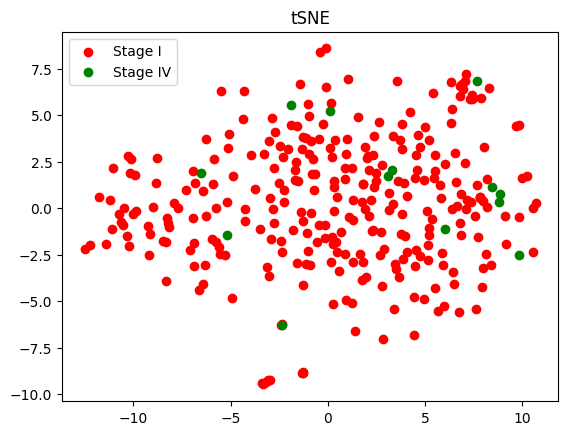

In [64]:
tsne = TSNE(n_components=2, n_iter=1000)
points = tsne.fit_transform(data_scale)


# Gráfico tSNE para o estádio FIGO
plt.figure()
for c, name in zip("rg", ["Stage I", "Stage IV"]):
    plt.scatter(points[meta_values == name, 0], points[meta_values == name, 1], c=c, label=name)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()

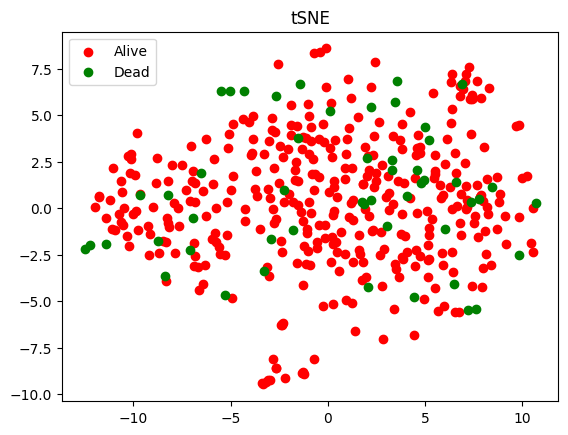

In [65]:
# Gráfico tSNE para o estado vital
plt.figure()
for c, name in zip("rg", ["Alive", "Dead"]):
    plt.scatter(points[meta_values2 == name, 0], points[meta_values2 == name, 1], c=c, label=name)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()


<p align="justify">
Tal como na redução de dimensionalidade através do PCA, através do método t-SNE, também não foi possível verificar uma separação clara dos dados com base nas duas condições mencionadas anteriormente.
</p>

### Clustering
<p align="justify">
O clustering é uma técnica de aprendizagem não supervisionada que identifica padrões e a estrutura nos dados, agrupando-os em conjuntos homogéneos. Utiliza medidas de distância ou similaridade para agrupar pontos de dados próximos, procurando maximizar a coesão intra-cluster e a separação inter-cluster. Esses grupos podem revelar insights sobre a estrutura subjacente dos dados.
</p>

<p align="justify">
No nosso relatório, foram abordados dois algoritmos de clustering: K-means, que é um algoritmo de clustering que divide um conjunto de dados em K clusters, minimizando a soma dos quadrados das distâncias entre os pontos e os centroides; e clustering hierárquico, que constrói uma árvore de clusters, onde cada nó representa um cluster.
</p>

#### Hierárquico

<p align="justify">
Este tipo de clustering baseia-se na probabilidade de pertencer a um grupo e segue uma abordagem aglomerativa (recorrendo à estratégia bottom-up), começando pelas folhas até à raiz da árvore. A análise do cluster hierárquico usa a distânca Euclidiana para calcular a proximidade entre os pontos num espaço multidimensional, considerando todas as dimensões.
</p>

In [29]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

  
    dendrogram(linkage_matrix, **kwargs)

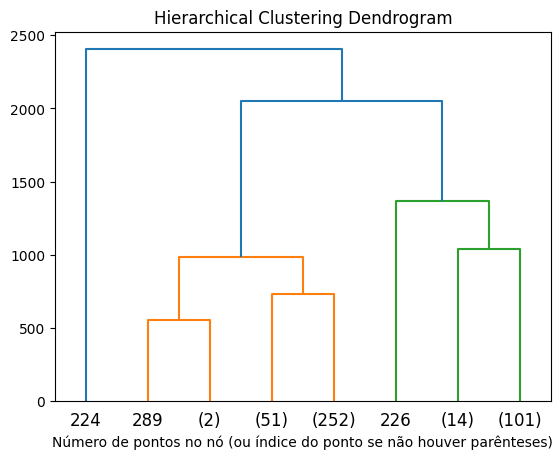

In [30]:
X = data_scale

# Inicialização do modelo de clustering hierárquico
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Ajuste do modelo aos dados
model.fit(X)

# Criação do dendograma
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Número de pontos no nó (ou índice do ponto se não houver parênteses)")
plt.show()

#### K-Means

<p align="justify">
Esta abordagem de clustering, agrupa os dados de forma a minimizar as distâncias entre os pontos e centróides dos clusters. Um método muito utilizado para auxiliar na determinação do número adequado de clusters é o “método do cotovelo”. Este método envolve a análise da variação da soma dos quadrados intra-cluster (WSS) em relação ao número de clusters.
</p>

[22003756.80508829, 21365735.762092568, 19039092.15394213, 18710487.02557339, 18922231.499951772, 16885544.654392127, 16881637.821824193, 16880296.88018752, 16305647.517548561]


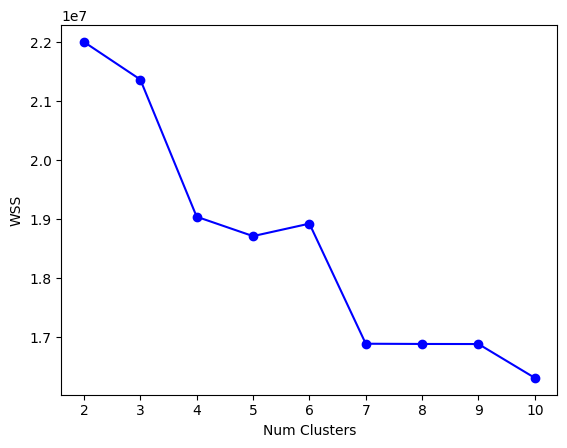

In [31]:
ofs = []


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = "auto")
    kmeans.fit(data_scale)
    ofs.append(kmeans.inertia_)


print(ofs)
plt.plot(range(2, 11), ofs, 'b-o')
plt.xlabel('Num Clusters')
plt.ylabel('WSS')
plt.show()


<p align="justify">
Através da observação do gráfico verificou-se que o ponto no gráfico que se assemelha a um “cotovelo” é o ponto K=3. A partir do ponto k=3, a adição de mais clusters não resulta numa redução significativa da WSS.
Partindo desse princípio, decidiu-se aplicar o algoritmo do K-means, de modo a criar uma tabela que permitisse analisar a distribuição das amostras nos clusters em relação ao metadado estudado (figo_stage).
</p>

In [32]:
kmeans3 = KMeans(n_clusters=3, n_init = "auto")
res_kmeans = kmeans3.fit(data_scale).predict(array_data)

pd.crosstab(amostras_filtradas.loc[:,"figo_stage"], res_kmeans)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


col_0,0,1,2
figo_stage,,,
Stage I,49,227,23
Stage II,11,20,4
Stage III,15,54,7
Stage IV,2,11,0


<p align="justify">
Observando a tabela, verificou-se que existem clusters que têm uma separação diferenciada dos dados no que toca ao metadado analisado (figo_stage), cumprindo o principal propósito do k-means.No entanto, existem clusters cuja separação dos dados não é a clara.
</p>

## Machine Learning (Análise supervisionada)

<p align="justify">
A análise supervisionada é uma abordagem de machine learning na qual os modelos são treinados com um conjunto de dados de entrada, juntamente com os rótulos associados a esses dados. Durante o treino, o modelo aprende a relação entre os dados de entrada e a sua classificação através de ajustes iterativos de modo a minimizar o erro entre as previsões e as classificações dos dados de treino. Após o treino, os modelos são utilizados para realizar a previsão da classificação de um novo conjunto de dados em que não se sabe a sua classificação.
</p>

<p align="justify">
Para dados de expressão, os modelos de machine learning podem ser utilizados para vários fins. Estes modelos são, por exemplo, utilizados para realizar a previsão de fenótipos com base no perfil de expressão genética sendo úteis para prever a resposta de um paciente a um determinado tratamento ou para prever a gravidade da doença e como esta poderá progredir com o tempo.
</p>

<p align="justify">
A primeira fase de machine learning consite na preparação dos dados de expressão genética para posteriomente serem utilizados para o treino do modelo e consequente teste do modelo.
Para isso filtrou-se os genes, mantendo-se apenas aqueles que foram identificados na análise de expressão diferencial e adicionou-se as colunas do estadio FIGO e do estado vital. Para além disso, foi também necessário codificar as variaveis estadio FIGO e estado vital de modo a ser possível correr os algorítimos de machine learning.

Estadio FIGO:
- Stage I :0
- Stage II: 1
- Stage III: 2
- Stage IV: 3

Estado Vital:
- Alive : 0
- Dead : 1
</p>

In [227]:
# Criação do objeto LabelEncoder
le = LabelEncoder()


# Processamento dos dados para posteriomente serem utilizados para machine learning
gene_expression = pd.DataFrame(preprocessing.scale(dados_EA),dados_EA.index,dados_EA.columns)
gene_expression = gene_expression.loc[res_ord_padj.index,:]
gene_expression = gene_expression.T
gene_expression["Estadio FIGO"] = amostras_filtradas["figo_stage"]
encoded_estadio_figo = le.fit_transform(gene_expression["Estadio FIGO"])
gene_expression["Estadio FIGO"] = encoded_estadio_figo
gene_expression["Estado Vital"] = amostras_filtradas["vital_status"]
encoded_estado_vital = le.fit_transform(gene_expression["Estado Vital"])
gene_expression["Estado Vital"] = encoded_estado_vital


# Extração dos dados utilizados na previsão
X = gene_expression.drop(['Estado Vital'], axis=1)
# Extração da classificação das várias amostras
Y = gene_expression['Estado Vital']


### Normalização

<p align="justify">
A normalização é uma fase crucial ligada ao pré-processamento de dados para modelos de aprendizagem de máquina. Esta prática é fundamental para evitar questões relacionadas com a escala dos valores presentes no conjunto de dados. No contexto deste relatório, optou-se por uma técnica de normalização que ajusta os dados para que estes variem somente entre 0 e 1, definindo-se 0 como o valor mínimo, e 1 como o valor máximo.
</p>

In [228]:
min_max_escala = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_scaled = min_max_escala.fit_transform(X)

### Divisão do Dataset

<p align="justify">
Após a filtragem dos genes diferencilamente expressos, procedeu-se à criação do dataset de treino e de teste sendo que se utilizou 70% dos dados para a criação do dataset de treino e cerca de 30% para o dataset de teste.
</p>

In [229]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, stratify=Y, train_size=0.7, test_size=0.3, random_state=30)
sss = StratifiedKFold(n_splits =10, random_state=30, shuffle=True) 

<p align="justify">
Na seguinte etapa do trabalho realizaram-se previsões, tendo por base os dados existentes, por outras palavras, previu-se a classificação  de uma nova amostra.
Para tal, foram treinados e testados três modelos: Random Forest, k-Nearest Neighbors e Support vector machine (SVM).
</p>

<p align="justify">
Para cada modelo, exploraram-se diversos hiperparâmetros. Recorreu-se a uma técnica de otimização de hiperparâmetros bastante utilizada em ML que se denomina Gridsearch. Nesta técnica, um conjunto de hiperparâmetros é especificado e todas as combinações possíveis desses hiperparâmetros são avaliadas usando validação cruzada. O objetivo foi encontrar a combinação de hiperparâmetros que resulte no melhor desempenho do modelo, sendo que se optou pela métrica do f1-score e do Coeficiente de Correlação de Matthews (MCC)como referências.
</p>

<p align="justify">
O F1-Score e o Coeficiente de Correlação de Matthews (MCC) são métricas importantes para avaliar modelos de classificação em machine learning. O F1-Score combina precisão (proporção de identificações positivas corretas) e recall (proporção de verdadeiros positivos identificados) numa única métrica. Os valores de F1-Score variam de 0 a 1, sendo 1 o ideal, indicando perfeição no modelo.
</p>
<p align="justify">
O MCC, por outro lado, mede a correlação entre as previsões e as observações verdadeiras, levando em conta todos os elementos da matriz de confusão (verdadeiros e falsos positivos e negativos). O MCC varia de -1 a +1, com +1 representando uma previsão perfeita.
Ambas as métricas são valiosas para contextos onde as classes são desbalanceadas ou os custos dos diferentes tipos de erros variam significativamente.
</p>

<p align="justify">
Neste trabalho, teve-se sempre em consideração um processo de validação cruzada de 10 vezes, do conjunto de dados de treino, em que uma parte do conjunto de dados, denominada de conjunto de validação, foi usada para teste e as outras nove foram usadas para treino. Este processo foi iterado mais de dez vezes, usando, por sua vez, cada uma das dez partes como conjunto de validação. 
</p>

<p align="justify">
Para conhecer a avaliação dos modelos, teve-se por base as confusion matrix obtidas, mais concretamente os valores dos TP, TN, FP e FN. Estes valores são a base das diferentes métricas avaliadas como a precision, accuracy, recall, entre outros.
</p>

<p align="justify">
Em suma, a pipeline realizada daqui em diante para cada um dos modelos de ML e DL mencionados será a seguinte:

1) Otimização dos hiperparâmetros por gridsearch (10 x cross-validation);

2) Treinar o modelo com o melhor conjunto de hiperparâmetros (70 % dataset-treino);

3) Testar o modelo treinado com o dataset test(30% dataset-test);

4) Avaliar as métricas obtidas.
</p>

### k-Nearest Neighbors

<p align="justify">
O algoritmo k-Nearest Neighbors (k-NN), é um algoritmo versátil usado tanto para classificação, quanto para regressão em machine learning. Este método opera sob a premissa de que pontos de dados com características semelhantes tendem a agrupar-se em espaços próximos. O parâmetro "k" no k-NN indica o número de vizinhos mais próximos a serem considerados na hora de predizer a classe de um ponto de dados novo.
</p>

<p align="justify">
Na modalidade de classificação, o k-NN identifica as k instâncias mais próximas do ponto novo, baseando-se numa medida de distância como a Euclidiana, e atribui-lhe a classe que mais aparece entre esses vizinhos. Por exemplo, se k for definido como 5, a classe mais comum entre os cinco vizinhos mais próximos determina a classe do ponto em questão.
</p>

<p align="justify">
Além da sua aplicação em classificação, o k-NN também pode ser empregado para regressão. Nesse caso, ao invés de escolher a classe mais frequente, o algoritmo calcula a média ou a mediana (dependendo da implementação) dos valores dos k vizinhos mais próximos para estimar um valor contínuo.
</p>

<p align="justify">
Um aspecto crucial para o bom desempenho do k-NN é a escolha do número k, que pode variar bastante dependendo do conjunto de dados. Um valor muito pequeno de k pode tornar o modelo sensível a ruídos, enquanto um valor muito grande pode incluir pontos que são, na verdade, distantes e menos similares, degradando a precisão do modelo. A escolha de uma métrica de distância adequada também é fundamental para garantir que as distâncias calculadas refletem as verdadeiras semelhanças entre as instâncias.
</p>

#### Explorar os hiperparâmetros e determinar a melhor combinação

In [231]:
# Definir os hiperparâmetros
parameters = {
    'n_neighbors': list(range(2,101)),
    'weights': ['uniform', 'distance'],
}


# Criar o modelo k-NN
knn = KNeighborsClassifier()


# Criar o objeto GridSearchCV
grid_search = GridSearchCV(knn, parameters, scoring='f1', cv= sss)


# Executar a busca em grid para encontrar os melhores hiperparâmetros
grid_search.fit(X_train, Y_train)
#grid_search.fit(divisao_treino.iloc[:,:], divisao_treino["Estado Vital"])


# Obter os melhores hiperparâmetros encontrados
best_params_KNN = grid_search.best_params_
best_params_KNN


{'n_neighbors': 2, 'weights': 'distance'}

Confusion Matrix:
[[98 14]
 [14  1]]

f1 no conjunto de teste:  0.06666666666666667
MCC no conjunto de teste:  -0.058333333333333334
Positivos verdadeiros: 98 Falsos positivos: 14 Verdadeiros negativos: 1 Falsos negativos: 14
Especificidade no conjunto de teste (tn / (tn+fp)):  0.06666666666666667
Sensibilidade no conjunto de teste (tp / (tp+fn)):  0.875
Precisão no conjunto de teste:  0.7795275590551181


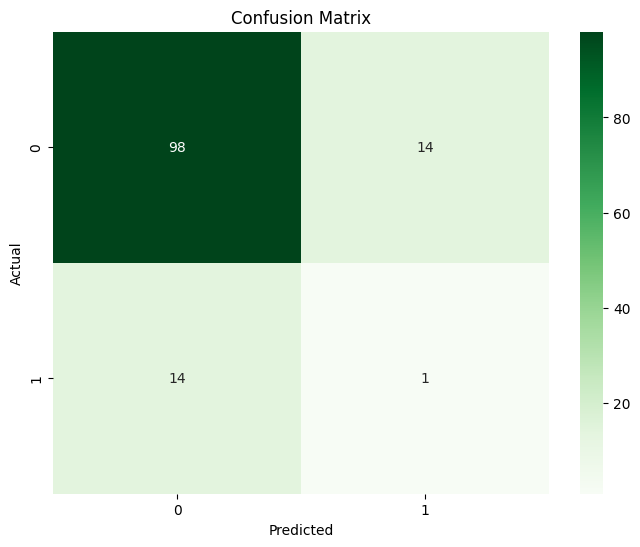

In [243]:
knn_best= grid_search.best_estimator_
y_pred = knn_best.predict(X_test)
confusion = confusion_matrix(Y_test, y_pred)


print("Confusion Matrix:")
print(confusion)
print('\nf1 no conjunto de teste: ', f1_score(Y_test, y_pred))
print('MCC no conjunto de teste: ', matthews_corrcoef(Y_test, y_pred))


tp, fp, fn, tn = confusion.ravel()
print(f"Positivos verdadeiros: {tp}",f"Falsos positivos: {fp}", f"Verdadeiros negativos: {tn}", f"Falsos negativos: {fn}")
specificity = tn / (tn+fp)
print('Especificidade no conjunto de teste (tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensibilidade no conjunto de teste (tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Precisão no conjunto de teste: ', accuracy)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


### Random Forest 

<p align="justify">
Random Forest (RF), é um método de machine learning que opera através da combinação de múltiplas árvores de decisão para melhorar a robustez e a precisão das previsões. É adequado tanto para classificação, quanto regressão. Este modelo constrói diversas árvores de decisão durante o treinamento e faz as previsões com base na média dos resultados das árvores para regressão ou na maioria dos votos para classificação.
</p>

<p align="justify">
Embora seja altamente eficaz para uma grande variedade de dados, o Random Forest pode enfrentar desafios quando aplicado a conjuntos de dados desbalanceados. Nestas situações, as classes minoritárias podem não ser representadas adequadamente, levando a um modelo tendencioso que favorece as classes maioritárias.
</p>

<p align="justify">
Para mitigar esse problema, as técnicas como ajuste de pesos de classe, oversampling da classe minoritária ou undersampling da classe maioritária podem ser empregadas para equilibrar o dataset antes do treinamento. Adicionalmente, o Random Forest permite ajustes nos seus parâmetros, como o número de árvores (n_estimators) e a profundidade máxima das árvores (max_depth), o que pode ser crucial para evitar overfitting e melhorar o desempenho do modelo em dados complexos.
</p>

#### Explorar os hiperparâmetros e determinar a melhor combinação

In [250]:
# Definir os parâmetros a ajustar
parameters = {
    'n_estimators': [2, 5, 10, 100, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 100]
}


# Criar o classificador RandomForest
RF_classifier = RandomForestClassifier(random_state=30)


# Criar o objeto GridSearchCV
grid_search = GridSearchCV(RF_classifier, parameters, scoring='f1', cv=sss)


# Executar o grid search usando os dados de treino (X_tr e y_tr)
grid_search.fit(X_train, Y_train)


# Obter os melhores parâmetros
best_params_RF = grid_search.best_params_
best_params_RF

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 5}

Confusion Matrix:
[[110   2]
 [ 13   2]]

f1 no conjunto de teste:  0.21052631578947367
MCC no conjunto de teste:  0.21338531959500043
Positivos verdadeiros: 110 Falsos positivos: 2 Verdadeiros negativos: 2 Falsos negativos: 13
Especificidade no conjunto de teste (tn / (tn+fp)):  0.5
Sensibilidade no conjunto de teste (tp / (tp+fn)):  0.8943089430894309
Precisão no conjunto de teste:  0.8818897637795275


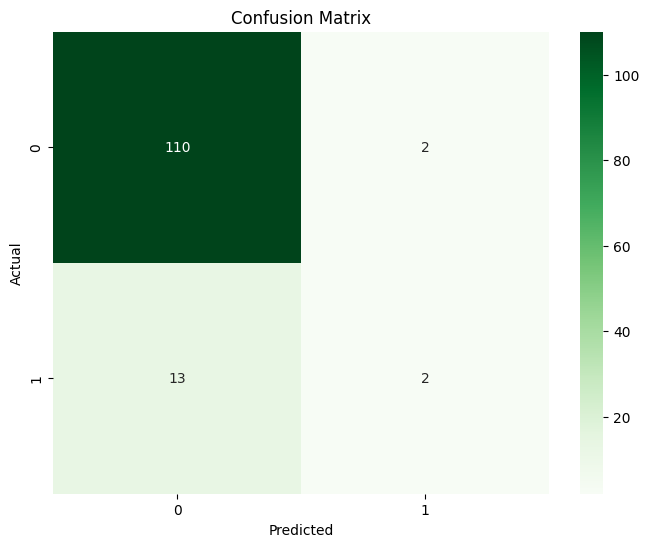

In [251]:
rf_best= grid_search.best_estimator_
y_pred = rf_best.predict(X_test)


confusion = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix:")
print(confusion)
print('\nf1 no conjunto de teste: ', f1_score(Y_test, y_pred))
print('MCC no conjunto de teste: ', matthews_corrcoef(Y_test, y_pred))

tp, fp, fn, tn = confusion.ravel()
print(f"Positivos verdadeiros: {tp}",f"Falsos positivos: {fp}", f"Verdadeiros negativos: {tn}", f"Falsos negativos: {fn}")
specificity = tn / (tn+fp)
print('Especificidade no conjunto de teste (tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensibilidade no conjunto de teste (tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Precisão no conjunto de teste: ', accuracy)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Support vector machine (SVM)

<p align="justify">
O modelo Support Vector Machine (SVM) é caracterizado pela sua robustez e versatilidade em tarefas de classificação e regressão, utilizando um hiperplano para efetivamente separar as classes em problemas de classificação binária. Além disso, o SVM busca maximizar a margem entre as duas classes, que é a distância entre o hiperplano e os pontos mais próximos de cada classe, conhecidos como vetores de suporte. Esta abordagem ajuda a minimizar o erro de generalização do classificador.
</p>
<p align="justify">
Uma das características mais poderosas do SVM é sua capacidade de operar em espaços de características de maior dimensão sem a necessidade de cálculos explícitos dessas dimensões. Funções como: a linear, polinomial, RBF (Radial Basis Function) e sigmoidal, permitem ao SVM lidar com dados que não são linearmente separáveis no espaço original.
</p>
<p align="justify">
É importante notar que SVMs podem ser computacionalmente exigentes, especialmente com grandes volumes de dados.
</p>
<p align="justify">
A aplicação eficaz de SVMs exige um pré-processamento cuidadoso dos dados, pois o modelo é sensível à escala das características. Normalizar ou padronizar os dados antes da aplicação do SVM é essencial. 
</p>
<p align="justify">
Os SVMs são extremamente poderosos e flexíveis, mas também exigem uma abordagem meticulosa no pré-processamento dos dados.
</p>

#### Explorar os hiperparâmetros e determinar a melhor combinação

In [247]:
parameters = {
    'C': [1,10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01]
} 
svm_classifier = SVC(random_state=30)
grid_search = GridSearchCV(svm_classifier, parameters, scoring='f1',cv=sss)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_params

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

Confusion Matrix:
[[104   8]
 [ 14   1]]

f1 no conjunto de teste:  0.08333333333333333
MCC no conjunto de teste:  -0.005989258911743612
Positivos verdadeiros: 104 Falsos positivos: 8 Verdadeiros negativos: 1 Falsos negativos: 14
Especificidade no conjunto de teste (tn / (tn+fp)):  0.1111111111111111
Sensibilidade no conjunto de teste (tp / (tp+fn)):  0.8813559322033898
Precisão no conjunto de teste:  0.8267716535433071


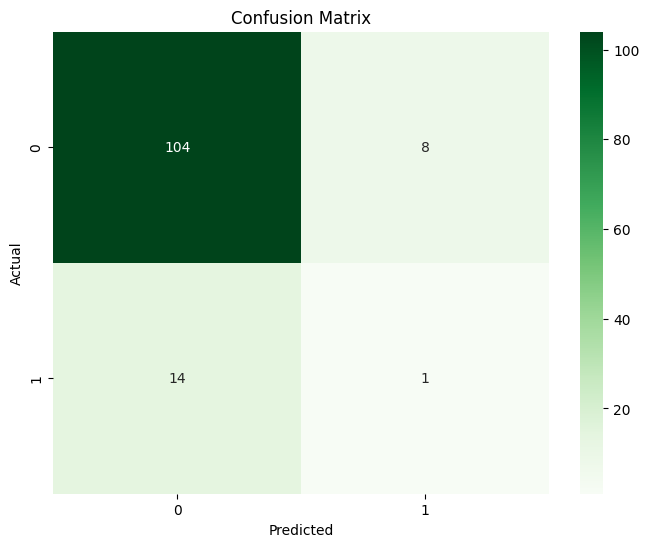

In [249]:
svm_best= grid_search.best_estimator_
y_pred = svm_best.predict(X_test)


confusion = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix:")
print(confusion)
print('\nf1 no conjunto de teste: ', f1_score(Y_test, y_pred))
print('MCC no conjunto de teste: ', matthews_corrcoef(Y_test, y_pred))

tp, fp, fn, tn = confusion.ravel()
print(f"Positivos verdadeiros: {tp}",f"Falsos positivos: {fp}", f"Verdadeiros negativos: {tn}", f"Falsos negativos: {fn}")
specificity = tn / (tn+fp)
print('Especificidade no conjunto de teste (tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensibilidade no conjunto de teste (tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Precisão no conjunto de teste: ', accuracy)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Interpretação global dos modelos

<p align="justify">
Com o objetivo de facilitar a visualização do melhor modelo, decidiu-se colocar todas as métricas avaliadas num dataframe. Além disso ordenou-se pelos valores apresentados, em primeiro lugar, na accuracy e, caso existisse um empate, o segundo critério seria o valor da precisão.
</p>

In [ ]:
# Abrir o arquivo CSV e ler os dados em um DataFrame
df_metricas = pd.read_csv('metricas.csv',sep=';',keep_default_na=False)
# Organizar o DataFrame com base nos valores da coluna 'accuracy' em ordem decrescente
df_metricas = df_metricas.sort_values(by=['Accuracy','Precision'], ascending=False)


# Imprimir o DataFrame organizado
df_metricas

#melhor modelo é RF

<p align="justify">
Observando o dataframe, pode-se concluir que das duas abordagens efectuadas, o modelo de Machine Learning que apresenta maiores valores nas métricas analisadas é o xxxxxx. Assim, decidiu-se utilizar esse modelo como referência. 
</p>

# Escolha das features mais importantes para o melhor modelo selecionado (XXXX)

# Conclusão
<p align="justify">
</p>

# Bibliografia

<p align="justify">
[1] Sung H, Ferlay J, Siegel RL, Laversanne M, Soerjomataram I, Jemal A, Bray F. Global Cancer Statistics 2020: GLOBOCAN Estimates of Incidence and Mortality Worldwide for 36 Cancers in 185 Countries. CA Cancer J Clin.
    doi: 10.3322/caac.21660.

[2] Creasman WT, Odicino F, Maisonneuve P, Quinn MA, Beller U, Benedet JL, Heintz A, Ngan H, Pecorelli S. Carcinoma of the Corpus Uteri. Int J Gynaecol Obstet.
    doi: 10.1016/S0020-7292(06)60031-3.

[3] Leslie KK, Thiel KW, Goodheart MJ, De Geest K, Jia Y, Yang S. Endometrial cancer. Obstet Gynecol Clin North Am.
    doi: 10.1016/j.ogc.2012.04.001.

[4] Bhatla, N., Berek, J.S., Cuello Fredes, M., Denny, L.A., Grenman, S., Karunaratne, K., Kehoe, S.T., Konishi, I., Olawaiye, A.B., Prat, J. and Sankaranarayanan, R. Revised FIGO staging for carcinoma of the cervix uteri†.
    doi: 10.1002/ijgo.12749.

[5] Lee DY, Kang Y, Im NR, Kim B, Kwon TK, Jung KY, Baek SK. Actin-Associated Gene Expression is Associated with Early Regional Metastasis of Tongue Cancer. Laryngoscope. 2021. doi: 10.1002/lary.29025..

[6] Bianco B, Barbosa CP, Trevisan CM, Laganà AS, Montagna E. Endometrial cancer: a genetic point of view. Transl Cancer Res. 2020. 
    doi: 10.21037/tcr-20-2334.
</p>
